In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.keras.layers import Dense # Just your regular densely-connected NN layer.
from tensorflow.keras.models import Sequential # model is a linear stack of layers.
from tensorflow.keras.optimizers import SGD # Stochastic gradient descent method
from tensorflow.keras.optimizers import Adam
from time import time

In [2]:
xl, yl, yt, xt = {}, {}, {}, {}
for i in range(1,5):
    xl[i] = pd.read_csv('Xl{}.csv'.format(i), index_col=0)
    yl[i] = pd.read_csv('Yl{}.csv'.format(i), index_col=0)
    yt[i] = pd.read_csv('Yt{}.csv'.format(i), index_col=0)
    xt[i] = pd.read_csv('Xt{}.csv'.format(i), index_col=0)

In [21]:
xl[1]

,0,1,2,3,4,5,6,7,8,9,10
24,0.933013,0.75,0.801938,0.099031,0.600779,0.989739,1.000000,0.500000,0.003534,0.000000,0.076786
25,0.933013,0.75,0.801938,0.099031,0.600779,0.989739,0.982963,0.629410,0.021261,0.000000,0.053571
26,0.933013,0.75,0.801938,0.099031,0.697431,0.959375,0.933013,0.750000,0.069631,0.000000,0.048214
27,0.933013,0.75,0.801938,0.099031,0.697431,0.959375,0.853553,0.853553,0.135129,0.000000,0.041071
28,0.933013,0.75,0.801938,0.099031,0.697431,0.959375,0.750000,0.933013,0.208398,0.000000,0.035714
...,...,...,...,...,...,...,...,...,...,...,...
17515,1.000000,0.50,0.801938,0.099031,0.399221,0.989739,0.629410,0.017037,0.287977,0.333333,0.346429
17516,1.000000,0.50,0.801938,0.099031,0.399221,0.989739,0.750000,0.066987,0.212270,0.333333,0.341071
17517,1.000000,0.50,0.801938,0.099031,0.399221,0.989739,0.853553,0.146447,0.138721,0.333333,0.335714
17518,1.000000,0.50,0.801938,0.099031,0.399221,0.989739,0.933013,0.250000,0.072481,0.333333,0.330357


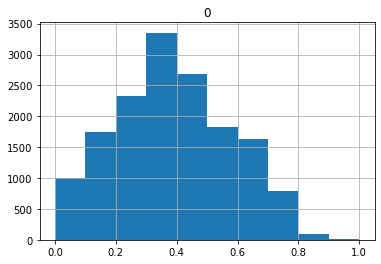

In [10]:
#import joblib
#joblib.load('scalerX')
yl[1].hist();

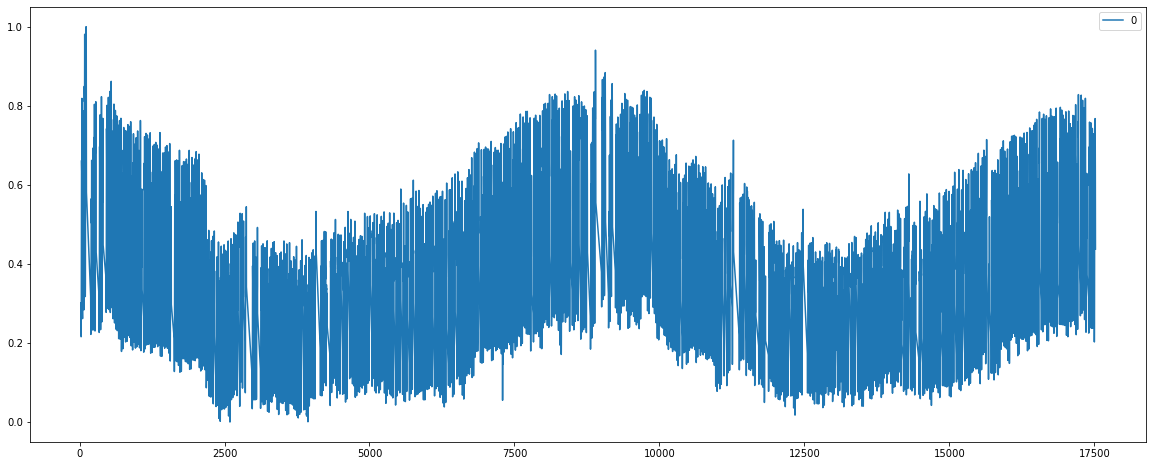

In [15]:
yl[1].plot(figsize=[20,8]);

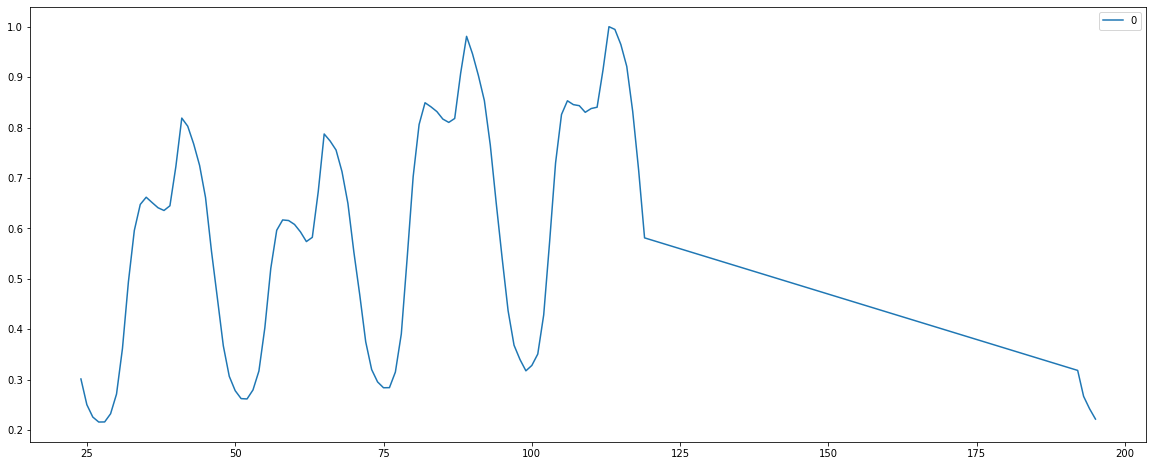

In [17]:
yl[1].iloc[:100].plot(figsize=[20,8]);

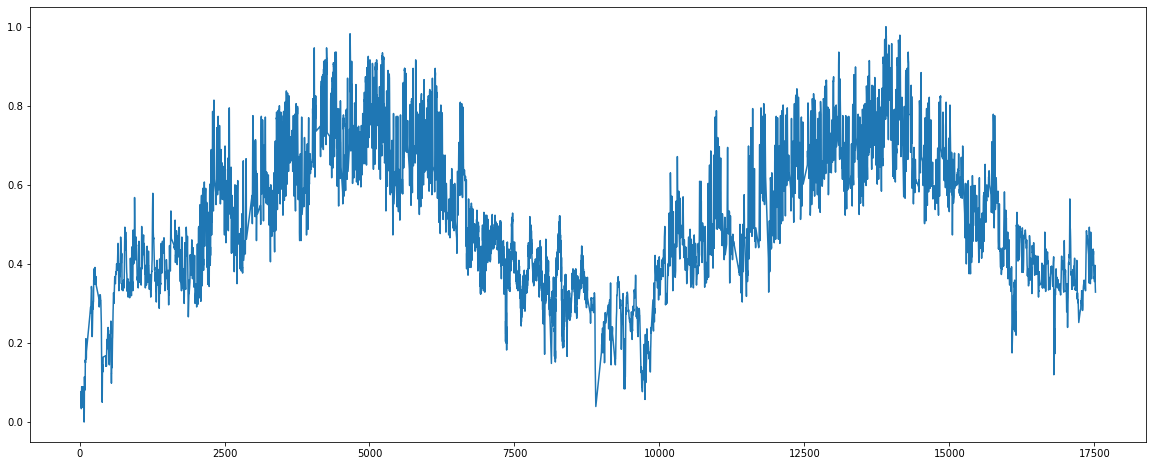

In [20]:
xl[1].iloc[:,-1].plot(figsize=[20,8]);

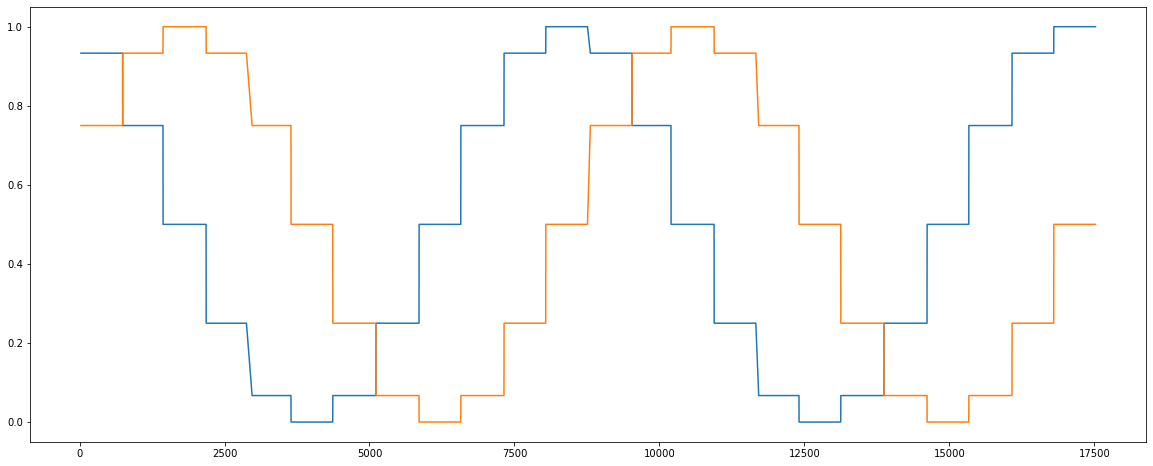

In [25]:
xl[1].iloc[:,0].plot(figsize=[20,8]); #month
xl[1].iloc[:,1].plot(figsize=[20,8]);

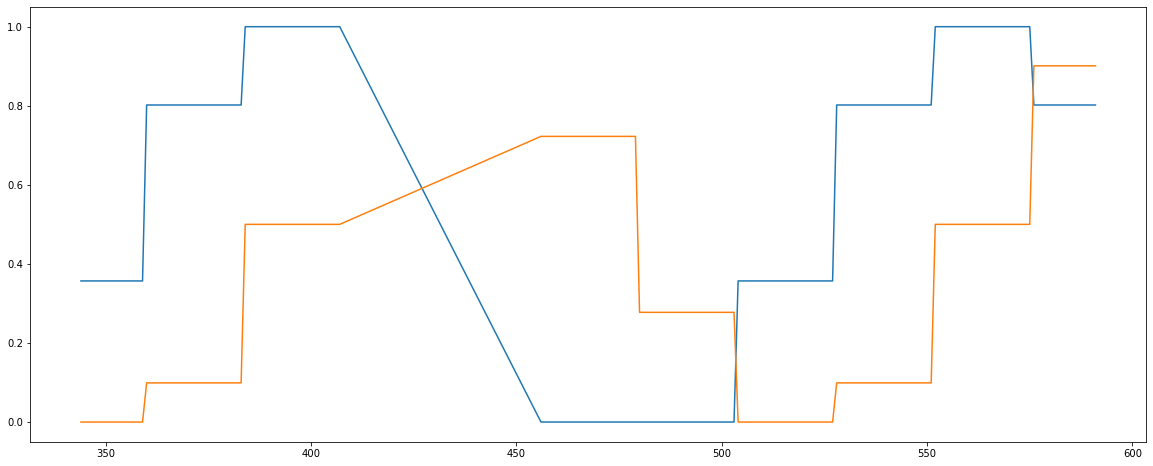

In [30]:
xl[1].iloc[200:400,2].plot(figsize=[20,8]); #timeseries for day of the weekend
xl[1].iloc[200:400,3].plot(figsize=[20,8]);

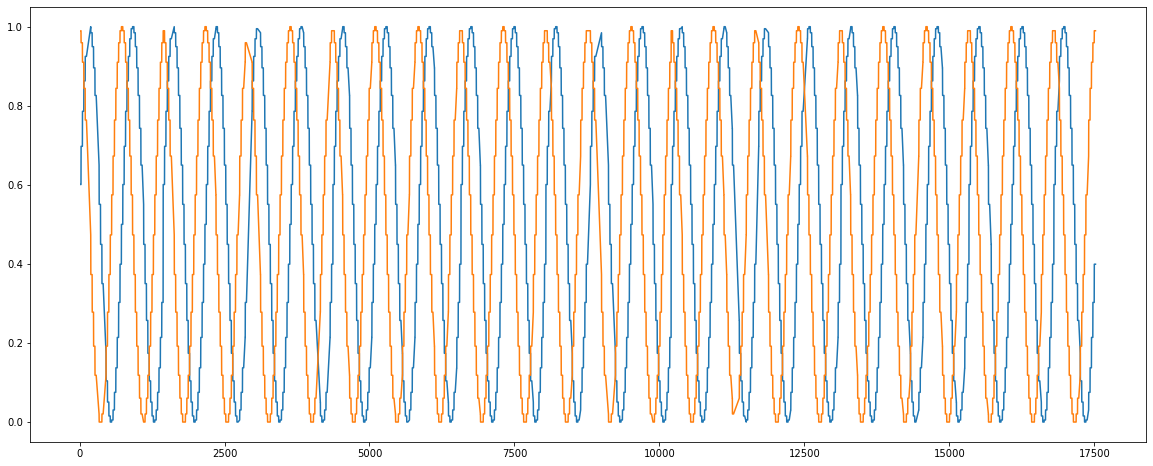

In [33]:
xl[1].iloc[:,4].plot(figsize=[20,8]); #timeseries for month beginning and end
xl[1].iloc[:,5].plot(figsize=[20,8]);

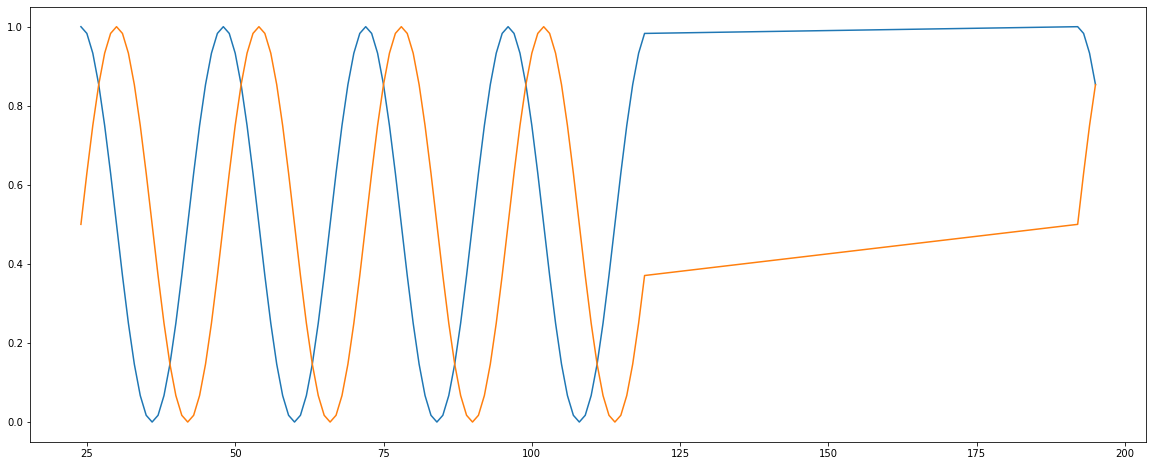

In [34]:
xl[1].iloc[:100,6].plot(figsize=[20,8]); #timeseries for hour of day
xl[1].iloc[:100,7].plot(figsize=[20,8]);

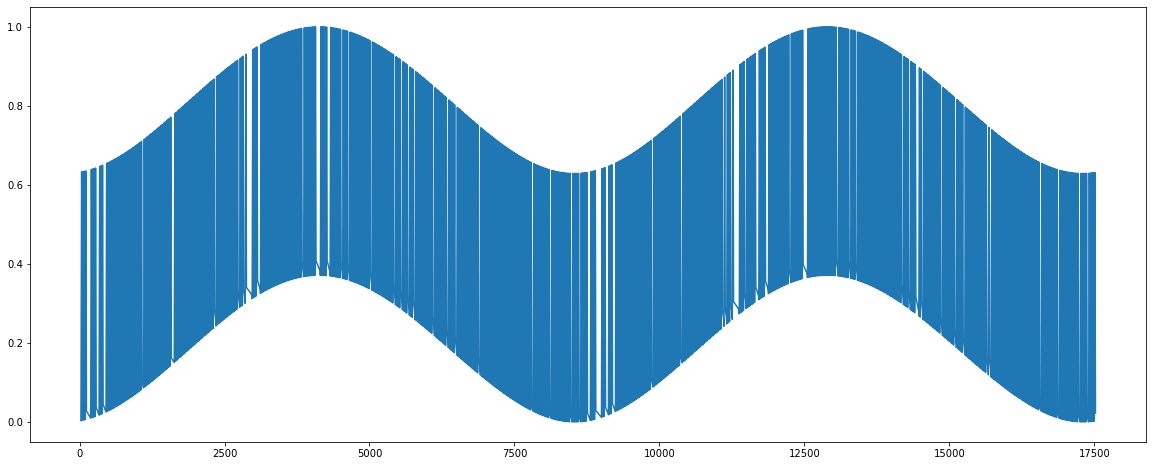

In [38]:
xl[1].iloc[:,8].plot(figsize=[20,8]); #daily value of something?

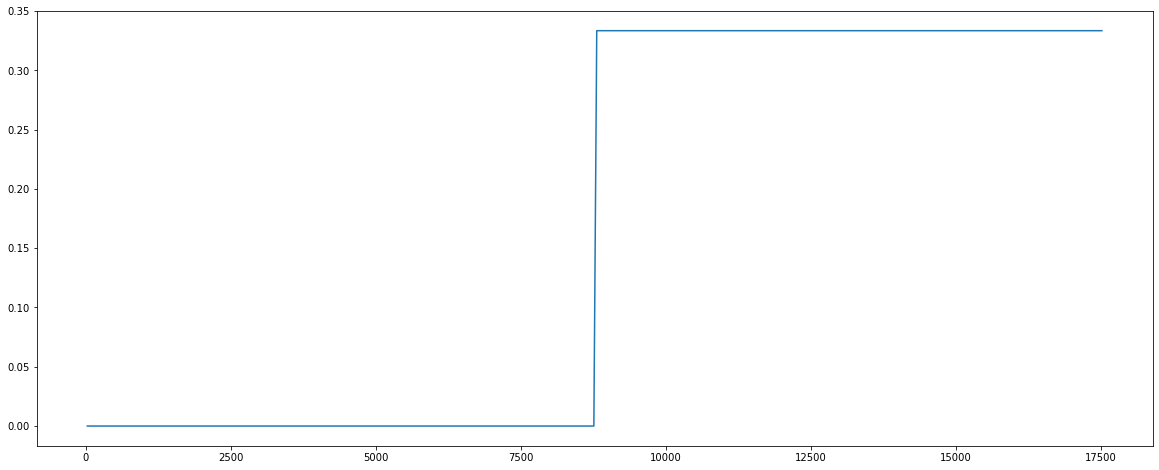

In [39]:
xl[1].iloc[:,9].plot(figsize=[20,8]); #timeseries for year

In [25]:
#if testing different architectures do not add too many neurons or layers!
model = Sequential()
model.add(Dense(30, input_dim = 11, activation = 'relu', kernel_initializer = 'he_uniform')) #first layer, number of neurons = number of inputs
model.add(Dense(12, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(12, activation = 'relu', kernel_initializer = 'he_uniform'))#hidden layer
model.add(Dense(1, activation = 'linear', kernel_initializer = 'he_uniform')) #output layer, linear activation for regression tasks (on other cases should be non-linear)
model.compile(loss = 'mean_squared_error', optimizer = Adam(lr=0.01)) #define learning rate to make it learn at different paces

In [5]:
start = time()
history = model.fit(xl[1],yl[1],validation_data=(xt[1],yt[1]), epochs=2000)
print('Total execution time: {} seconds'.format(time()-start))

Epoch 1/2000
483/483 [==============================] - 0s 760us/step - loss: 0.0293 - val_loss: 0.0219
Epoch 2/2000
483/483 [==============================] - 0s 543us/step - loss: 0.0113 - val_loss: 0.0141
Epoch 3/2000
483/483 [==============================] - 0s 558us/step - loss: 0.0082 - val_loss: 0.0120
Epoch 4/2000
483/483 [==============================] - 0s 543us/step - loss: 0.0064 - val_loss: 0.0101
Epoch 5/2000
483/483 [==============================] - 0s 539us/step - loss: 0.0051 - val_loss: 0.0084
Epoch 6/2000
483/483 [==============================] - 0s 541us/step - loss: 0.0044 - val_loss: 0.0075
Epoch 7/2000
483/483 [==============================] - 0s 543us/step - loss: 0.0040 - val_loss: 0.0064
Epoch 8/2000
483/483 [==============================] - 0s 537us/step - loss: 0.0037 - val_loss: 0.0059
Epoch 9/2000
483/483 [==============================] - 0s 535us/step - loss: 0.0036 - val_loss: 0.0054
Epoch 10/2000
483/483 [==============================] - 0s 543u

483/483 [==============================] - 0s 541us/step - loss: 0.0016 - val_loss: 0.0030
Epoch 80/2000
483/483 [==============================] - 0s 531us/step - loss: 0.0016 - val_loss: 0.0029
Epoch 81/2000
483/483 [==============================] - 0s 533us/step - loss: 0.0016 - val_loss: 0.0029
Epoch 82/2000
483/483 [==============================] - 0s 669us/step - loss: 0.0016 - val_loss: 0.0029
Epoch 83/2000
483/483 [==============================] - 0s 578us/step - loss: 0.0016 - val_loss: 0.0028
Epoch 84/2000
483/483 [==============================] - 0s 593us/step - loss: 0.0016 - val_loss: 0.0029
Epoch 85/2000
483/483 [==============================] - 0s 597us/step - loss: 0.0016 - val_loss: 0.0028
Epoch 86/2000
483/483 [==============================] - 0s 605us/step - loss: 0.0016 - val_loss: 0.0028
Epoch 87/2000
483/483 [==============================] - 0s 566us/step - loss: 0.0016 - val_loss: 0.0028
Epoch 88/2000
483/483 [==============================] - 0s 564us/ste

483/483 [==============================] - 0s 529us/step - loss: 0.0010 - val_loss: 0.0024
Epoch 234/2000
483/483 [==============================] - 0s 551us/step - loss: 0.0010 - val_loss: 0.0024
Epoch 235/2000
483/483 [==============================] - 0s 551us/step - loss: 0.0010 - val_loss: 0.0024
Epoch 236/2000
483/483 [==============================] - 0s 537us/step - loss: 0.0010 - val_loss: 0.0024
Epoch 237/2000
483/483 [==============================] - 0s 529us/step - loss: 0.0010 - val_loss: 0.0024
Epoch 238/2000
483/483 [==============================] - 0s 547us/step - loss: 0.0010 - val_loss: 0.0024
Epoch 239/2000
483/483 [==============================] - 0s 535us/step - loss: 0.0010 - val_loss: 0.0024
Epoch 240/2000
483/483 [==============================] - 0s 535us/step - loss: 0.0010 - val_loss: 0.0024
Epoch 241/2000
483/483 [==============================] - 0s 531us/step - loss: 0.0010 - val_loss: 0.0024
Epoch 242/2000
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 545us/step - loss: 9.4767e-04 - val_loss: 0.0023
Epoch 309/2000
483/483 [==============================] - 0s 537us/step - loss: 9.4529e-04 - val_loss: 0.0023
Epoch 310/2000
483/483 [==============================] - 0s 537us/step - loss: 9.4670e-04 - val_loss: 0.0024
Epoch 311/2000
483/483 [==============================] - 0s 541us/step - loss: 9.4335e-04 - val_loss: 0.0024
Epoch 312/2000
483/483 [==============================] - 0s 539us/step - loss: 9.4555e-04 - val_loss: 0.0024
Epoch 313/2000
483/483 [==============================] - 0s 541us/step - loss: 9.4437e-04 - val_loss: 0.0023
Epoch 314/2000
483/483 [==============================] - 0s 545us/step - loss: 9.4783e-04 - val_loss: 0.0024
Epoch 315/2000
483/483 [==============================] - 0s 535us/step - loss: 9.4214e-04 - val_loss: 0.0023
Epoch 316/2000
483/483 [==============================] - 0s 535us/step - loss: 9.4043e-04 - val_loss: 0.0023
Epoch 317/2000
483/483 [=

483/483 [==============================] - 0s 531us/step - loss: 8.7814e-04 - val_loss: 0.0024
Epoch 457/2000
483/483 [==============================] - 0s 535us/step - loss: 8.8106e-04 - val_loss: 0.0023
Epoch 458/2000
483/483 [==============================] - 0s 539us/step - loss: 8.7639e-04 - val_loss: 0.0023
Epoch 459/2000
483/483 [==============================] - 0s 533us/step - loss: 8.8222e-04 - val_loss: 0.0023
Epoch 460/2000
483/483 [==============================] - 0s 537us/step - loss: 8.8014e-04 - val_loss: 0.0023
Epoch 461/2000
483/483 [==============================] - 0s 537us/step - loss: 8.7637e-04 - val_loss: 0.0023
Epoch 462/2000
483/483 [==============================] - 0s 535us/step - loss: 8.7575e-04 - val_loss: 0.0024
Epoch 463/2000
483/483 [==============================] - 0s 529us/step - loss: 8.7899e-04 - val_loss: 0.0024
Epoch 464/2000
483/483 [==============================] - 0s 527us/step - loss: 8.7865e-04 - val_loss: 0.0024
Epoch 465/2000
483/483 [=

483/483 [==============================] - 0s 543us/step - loss: 8.3668e-04 - val_loss: 0.0025
Epoch 605/2000
483/483 [==============================] - 0s 543us/step - loss: 8.3191e-04 - val_loss: 0.0023
Epoch 606/2000
483/483 [==============================] - 0s 568us/step - loss: 8.3250e-04 - val_loss: 0.0023
Epoch 607/2000
483/483 [==============================] - 0s 529us/step - loss: 8.3221e-04 - val_loss: 0.0024
Epoch 608/2000
483/483 [==============================] - 0s 539us/step - loss: 8.3371e-04 - val_loss: 0.0023
Epoch 609/2000
483/483 [==============================] - 0s 535us/step - loss: 8.4555e-04 - val_loss: 0.0024
Epoch 610/2000
483/483 [==============================] - 0s 529us/step - loss: 8.3476e-04 - val_loss: 0.0023
Epoch 611/2000
483/483 [==============================] - 0s 529us/step - loss: 8.3801e-04 - val_loss: 0.0025
Epoch 612/2000
483/483 [==============================] - 0s 535us/step - loss: 8.3648e-04 - val_loss: 0.0024
Epoch 613/2000
483/483 [=

483/483 [==============================] - 0s 549us/step - loss: 8.0459e-04 - val_loss: 0.0024
Epoch 753/2000
483/483 [==============================] - 0s 665us/step - loss: 8.0978e-04 - val_loss: 0.0024
Epoch 754/2000
483/483 [==============================] - 0s 564us/step - loss: 8.0791e-04 - val_loss: 0.0025
Epoch 755/2000
483/483 [==============================] - 0s 584us/step - loss: 8.0630e-04 - val_loss: 0.0024
Epoch 756/2000
483/483 [==============================] - 0s 572us/step - loss: 8.0257e-04 - val_loss: 0.0024
Epoch 757/2000
483/483 [==============================] - 0s 607us/step - loss: 8.0521e-04 - val_loss: 0.0024
Epoch 758/2000
483/483 [==============================] - 0s 555us/step - loss: 8.0470e-04 - val_loss: 0.0024
Epoch 759/2000
483/483 [==============================] - 0s 574us/step - loss: 8.0984e-04 - val_loss: 0.0025
Epoch 760/2000
483/483 [==============================] - 0s 564us/step - loss: 8.0308e-04 - val_loss: 0.0024
Epoch 761/2000
483/483 [=

483/483 [==============================] - 0s 535us/step - loss: 7.8830e-04 - val_loss: 0.0028
Epoch 901/2000
483/483 [==============================] - 0s 531us/step - loss: 7.8724e-04 - val_loss: 0.0028
Epoch 902/2000
483/483 [==============================] - 0s 549us/step - loss: 7.8238e-04 - val_loss: 0.0025
Epoch 903/2000
483/483 [==============================] - 0s 539us/step - loss: 7.8322e-04 - val_loss: 0.0027
Epoch 904/2000
483/483 [==============================] - 0s 588us/step - loss: 7.7824e-04 - val_loss: 0.0026
Epoch 905/2000
483/483 [==============================] - 0s 574us/step - loss: 7.7965e-04 - val_loss: 0.0026
Epoch 906/2000
483/483 [==============================] - 0s 553us/step - loss: 7.8423e-04 - val_loss: 0.0025
Epoch 907/2000
483/483 [==============================] - 0s 555us/step - loss: 7.8007e-04 - val_loss: 0.0026
Epoch 908/2000
483/483 [==============================] - 0s 541us/step - loss: 7.7803e-04 - val_loss: 0.0026
Epoch 909/2000
483/483 [=

483/483 [==============================] - 0s 531us/step - loss: 7.5975e-04 - val_loss: 0.0026
Epoch 1049/2000
483/483 [==============================] - 0s 529us/step - loss: 7.6508e-04 - val_loss: 0.0027
Epoch 1050/2000
483/483 [==============================] - 0s 541us/step - loss: 7.6166e-04 - val_loss: 0.0027
Epoch 1051/2000
483/483 [==============================] - 0s 529us/step - loss: 7.6146e-04 - val_loss: 0.0028
Epoch 1052/2000
483/483 [==============================] - 0s 580us/step - loss: 7.5928e-04 - val_loss: 0.0027
Epoch 1053/2000
483/483 [==============================] - 0s 564us/step - loss: 7.5855e-04 - val_loss: 0.0027
Epoch 1054/2000
483/483 [==============================] - 0s 549us/step - loss: 7.6011e-04 - val_loss: 0.0027
Epoch 1055/2000
483/483 [==============================] - 0s 541us/step - loss: 7.6390e-04 - val_loss: 0.0026
Epoch 1056/2000
483/483 [==============================] - 0s 560us/step - loss: 7.6217e-04 - val_loss: 0.0027
Epoch 1057/2000
4

Epoch 1122/2000
483/483 [==============================] - 0s 617us/step - loss: 7.5540e-04 - val_loss: 0.0028
Epoch 1123/2000
483/483 [==============================] - 0s 619us/step - loss: 7.5478e-04 - val_loss: 0.0029
Epoch 1124/2000
483/483 [==============================] - 0s 541us/step - loss: 7.5293e-04 - val_loss: 0.0027
Epoch 1125/2000
483/483 [==============================] - 0s 539us/step - loss: 7.5181e-04 - val_loss: 0.0027
Epoch 1126/2000
483/483 [==============================] - 0s 533us/step - loss: 7.5075e-04 - val_loss: 0.0028
Epoch 1127/2000
483/483 [==============================] - 0s 537us/step - loss: 7.5582e-04 - val_loss: 0.0028
Epoch 1128/2000
483/483 [==============================] - 0s 545us/step - loss: 7.5246e-04 - val_loss: 0.0028
Epoch 1129/2000
483/483 [==============================] - 0s 545us/step - loss: 7.5351e-04 - val_loss: 0.0029
Epoch 1130/2000
483/483 [==============================] - 0s 539us/step - loss: 7.5770e-04 - val_loss: 0.0026
E

Epoch 1196/2000
483/483 [==============================] - 0s 527us/step - loss: 7.4953e-04 - val_loss: 0.0028
Epoch 1197/2000
483/483 [==============================] - 0s 522us/step - loss: 7.5062e-04 - val_loss: 0.0028
Epoch 1198/2000
483/483 [==============================] - 0s 535us/step - loss: 7.4490e-04 - val_loss: 0.0029
Epoch 1199/2000
483/483 [==============================] - 0s 535us/step - loss: 7.4716e-04 - val_loss: 0.0028
Epoch 1200/2000
483/483 [==============================] - 0s 524us/step - loss: 7.4983e-04 - val_loss: 0.0028
Epoch 1201/2000
483/483 [==============================] - 0s 527us/step - loss: 7.4565e-04 - val_loss: 0.0029
Epoch 1202/2000
483/483 [==============================] - 0s 535us/step - loss: 7.4777e-04 - val_loss: 0.0028
Epoch 1203/2000
483/483 [==============================] - 0s 524us/step - loss: 7.4831e-04 - val_loss: 0.0028
Epoch 1204/2000
483/483 [==============================] - 0s 527us/step - loss: 7.4414e-04 - val_loss: 0.0027
E

Epoch 1270/2000
483/483 [==============================] - 0s 524us/step - loss: 7.3947e-04 - val_loss: 0.0029
Epoch 1271/2000
483/483 [==============================] - 0s 533us/step - loss: 7.3963e-04 - val_loss: 0.0029
Epoch 1272/2000
483/483 [==============================] - 0s 535us/step - loss: 7.3757e-04 - val_loss: 0.0030
Epoch 1273/2000
483/483 [==============================] - 0s 531us/step - loss: 7.4019e-04 - val_loss: 0.0029
Epoch 1274/2000
483/483 [==============================] - 0s 529us/step - loss: 7.3732e-04 - val_loss: 0.0029
Epoch 1275/2000
483/483 [==============================] - 0s 531us/step - loss: 7.3897e-04 - val_loss: 0.0028
Epoch 1276/2000
483/483 [==============================] - 0s 529us/step - loss: 7.4306e-04 - val_loss: 0.0029
Epoch 1277/2000
483/483 [==============================] - 0s 524us/step - loss: 7.3301e-04 - val_loss: 0.0028
Epoch 1278/2000
483/483 [==============================] - 0s 529us/step - loss: 7.3533e-04 - val_loss: 0.0029
E

Epoch 1344/2000
483/483 [==============================] - 0s 537us/step - loss: 7.3325e-04 - val_loss: 0.0029
Epoch 1345/2000
483/483 [==============================] - 0s 537us/step - loss: 7.3339e-04 - val_loss: 0.0029
Epoch 1346/2000
483/483 [==============================] - 0s 541us/step - loss: 7.3141e-04 - val_loss: 0.0028
Epoch 1347/2000
483/483 [==============================] - 0s 555us/step - loss: 7.3070e-04 - val_loss: 0.0030
Epoch 1348/2000
483/483 [==============================] - 0s 547us/step - loss: 7.2853e-04 - val_loss: 0.0030
Epoch 1349/2000
483/483 [==============================] - 0s 535us/step - loss: 7.3050e-04 - val_loss: 0.0031
Epoch 1350/2000
483/483 [==============================] - 0s 537us/step - loss: 7.2922e-04 - val_loss: 0.0029
Epoch 1351/2000
483/483 [==============================] - 0s 535us/step - loss: 7.3206e-04 - val_loss: 0.0030
Epoch 1352/2000
483/483 [==============================] - 0s 547us/step - loss: 7.3064e-04 - val_loss: 0.0029
E

Epoch 1418/2000
483/483 [==============================] - 0s 533us/step - loss: 7.2226e-04 - val_loss: 0.0031
Epoch 1419/2000
483/483 [==============================] - 0s 529us/step - loss: 7.2167e-04 - val_loss: 0.0029
Epoch 1420/2000
483/483 [==============================] - 0s 553us/step - loss: 7.2387e-04 - val_loss: 0.0028
Epoch 1421/2000
483/483 [==============================] - 0s 527us/step - loss: 7.2318e-04 - val_loss: 0.0029
Epoch 1422/2000
483/483 [==============================] - 0s 537us/step - loss: 7.2034e-04 - val_loss: 0.0030
Epoch 1423/2000
483/483 [==============================] - 0s 527us/step - loss: 7.2262e-04 - val_loss: 0.0029
Epoch 1424/2000
483/483 [==============================] - 0s 527us/step - loss: 7.1938e-04 - val_loss: 0.0031
Epoch 1425/2000
483/483 [==============================] - 0s 529us/step - loss: 7.2024e-04 - val_loss: 0.0029
Epoch 1426/2000
483/483 [==============================] - 0s 535us/step - loss: 7.2347e-04 - val_loss: 0.0028
E

Epoch 1492/2000
483/483 [==============================] - 0s 524us/step - loss: 7.1468e-04 - val_loss: 0.0030
Epoch 1493/2000
483/483 [==============================] - 0s 527us/step - loss: 7.1688e-04 - val_loss: 0.0029
Epoch 1494/2000
483/483 [==============================] - 0s 543us/step - loss: 7.1539e-04 - val_loss: 0.0030
Epoch 1495/2000
483/483 [==============================] - 0s 657us/step - loss: 7.1669e-04 - val_loss: 0.0028
Epoch 1496/2000
483/483 [==============================] - 0s 586us/step - loss: 7.1529e-04 - val_loss: 0.0029
Epoch 1497/2000
483/483 [==============================] - 0s 603us/step - loss: 7.1905e-04 - val_loss: 0.0030
Epoch 1498/2000
483/483 [==============================] - 0s 593us/step - loss: 7.1864e-04 - val_loss: 0.0029
Epoch 1499/2000
483/483 [==============================] - 0s 551us/step - loss: 7.1970e-04 - val_loss: 0.0029
Epoch 1500/2000
483/483 [==============================] - 0s 564us/step - loss: 7.1843e-04 - val_loss: 0.0029
E

Epoch 1566/2000
483/483 [==============================] - 0s 533us/step - loss: 7.0845e-04 - val_loss: 0.0030
Epoch 1567/2000
483/483 [==============================] - 0s 580us/step - loss: 7.0893e-04 - val_loss: 0.0029
Epoch 1568/2000
483/483 [==============================] - 0s 566us/step - loss: 7.1066e-04 - val_loss: 0.0029
Epoch 1569/2000
483/483 [==============================] - 0s 543us/step - loss: 7.0723e-04 - val_loss: 0.0029
Epoch 1570/2000
483/483 [==============================] - 0s 527us/step - loss: 7.1228e-04 - val_loss: 0.0030
Epoch 1571/2000
483/483 [==============================] - 0s 541us/step - loss: 7.1204e-04 - val_loss: 0.0030
Epoch 1572/2000
483/483 [==============================] - 0s 566us/step - loss: 7.1252e-04 - val_loss: 0.0029
Epoch 1573/2000
483/483 [==============================] - 0s 558us/step - loss: 7.0743e-04 - val_loss: 0.0030
Epoch 1574/2000
483/483 [==============================] - 0s 522us/step - loss: 7.0833e-04 - val_loss: 0.0030
E

Epoch 1640/2000
483/483 [==============================] - 0s 527us/step - loss: 7.0663e-04 - val_loss: 0.0029
Epoch 1641/2000
483/483 [==============================] - 0s 527us/step - loss: 7.0264e-04 - val_loss: 0.0029
Epoch 1642/2000
483/483 [==============================] - 0s 547us/step - loss: 7.0079e-04 - val_loss: 0.0031
Epoch 1643/2000
483/483 [==============================] - 0s 613us/step - loss: 7.0421e-04 - val_loss: 0.0031
Epoch 1644/2000
483/483 [==============================] - 0s 547us/step - loss: 7.0361e-04 - val_loss: 0.0029
Epoch 1645/2000
483/483 [==============================] - 0s 562us/step - loss: 7.0128e-04 - val_loss: 0.0030
Epoch 1646/2000
483/483 [==============================] - 0s 578us/step - loss: 7.0511e-04 - val_loss: 0.0029
Epoch 1647/2000
483/483 [==============================] - 0s 580us/step - loss: 7.0363e-04 - val_loss: 0.0032
Epoch 1648/2000
483/483 [==============================] - 0s 560us/step - loss: 7.0124e-04 - val_loss: 0.0030
E

Epoch 1714/2000
483/483 [==============================] - 0s 535us/step - loss: 7.0040e-04 - val_loss: 0.0030
Epoch 1715/2000
483/483 [==============================] - 0s 531us/step - loss: 6.9960e-04 - val_loss: 0.0030
Epoch 1716/2000
483/483 [==============================] - 0s 539us/step - loss: 6.9863e-04 - val_loss: 0.0029
Epoch 1717/2000
483/483 [==============================] - 0s 531us/step - loss: 6.9997e-04 - val_loss: 0.0030
Epoch 1718/2000
483/483 [==============================] - 0s 539us/step - loss: 6.9915e-04 - val_loss: 0.0030
Epoch 1719/2000
483/483 [==============================] - 0s 535us/step - loss: 6.9763e-04 - val_loss: 0.0030
Epoch 1720/2000
483/483 [==============================] - 0s 537us/step - loss: 7.0200e-04 - val_loss: 0.0031
Epoch 1721/2000
483/483 [==============================] - 0s 537us/step - loss: 6.9807e-04 - val_loss: 0.0030
Epoch 1722/2000
483/483 [==============================] - 0s 541us/step - loss: 6.9677e-04 - val_loss: 0.0030
E

Epoch 1788/2000
483/483 [==============================] - 0s 537us/step - loss: 6.9645e-04 - val_loss: 0.0031
Epoch 1789/2000
483/483 [==============================] - 0s 531us/step - loss: 6.9607e-04 - val_loss: 0.0031
Epoch 1790/2000
483/483 [==============================] - 0s 533us/step - loss: 6.9309e-04 - val_loss: 0.0032
Epoch 1791/2000
483/483 [==============================] - 0s 529us/step - loss: 6.9483e-04 - val_loss: 0.0030
Epoch 1792/2000
483/483 [==============================] - 0s 537us/step - loss: 6.9649e-04 - val_loss: 0.0031
Epoch 1793/2000
483/483 [==============================] - 0s 541us/step - loss: 6.9579e-04 - val_loss: 0.0030
Epoch 1794/2000
483/483 [==============================] - 0s 535us/step - loss: 6.9462e-04 - val_loss: 0.0030
Epoch 1795/2000
483/483 [==============================] - 0s 533us/step - loss: 6.9799e-04 - val_loss: 0.0031
Epoch 1796/2000
483/483 [==============================] - 0s 533us/step - loss: 6.9170e-04 - val_loss: 0.0031
E

Epoch 1862/2000
483/483 [==============================] - 0s 545us/step - loss: 6.8964e-04 - val_loss: 0.0031
Epoch 1863/2000
483/483 [==============================] - 0s 535us/step - loss: 6.8870e-04 - val_loss: 0.0030
Epoch 1864/2000
483/483 [==============================] - 0s 537us/step - loss: 6.9240e-04 - val_loss: 0.0033
Epoch 1865/2000
483/483 [==============================] - 0s 549us/step - loss: 6.9096e-04 - val_loss: 0.0029
Epoch 1866/2000
483/483 [==============================] - 0s 545us/step - loss: 6.8838e-04 - val_loss: 0.0029
Epoch 1867/2000
483/483 [==============================] - 0s 539us/step - loss: 6.9105e-04 - val_loss: 0.0029
Epoch 1868/2000
483/483 [==============================] - 0s 533us/step - loss: 6.8983e-04 - val_loss: 0.0031
Epoch 1869/2000
483/483 [==============================] - 0s 535us/step - loss: 6.9612e-04 - val_loss: 0.0030
Epoch 1870/2000
483/483 [==============================] - 0s 535us/step - loss: 6.9246e-04 - val_loss: 0.0032
E

Epoch 1936/2000
483/483 [==============================] - 0s 533us/step - loss: 6.8542e-04 - val_loss: 0.0031
Epoch 1937/2000
483/483 [==============================] - 0s 543us/step - loss: 6.8330e-04 - val_loss: 0.0032
Epoch 1938/2000
483/483 [==============================] - 0s 537us/step - loss: 6.8390e-04 - val_loss: 0.0029
Epoch 1939/2000
483/483 [==============================] - 0s 539us/step - loss: 6.8549e-04 - val_loss: 0.0032
Epoch 1940/2000
483/483 [==============================] - 0s 537us/step - loss: 6.8842e-04 - val_loss: 0.0032
Epoch 1941/2000
483/483 [==============================] - 0s 537us/step - loss: 6.8841e-04 - val_loss: 0.0030
Epoch 1942/2000
483/483 [==============================] - 0s 535us/step - loss: 6.8486e-04 - val_loss: 0.0032
Epoch 1943/2000
483/483 [==============================] - 0s 543us/step - loss: 6.8420e-04 - val_loss: 0.0033
Epoch 1944/2000
483/483 [==============================] - 0s 537us/step - loss: 6.8395e-04 - val_loss: 0.0031
E

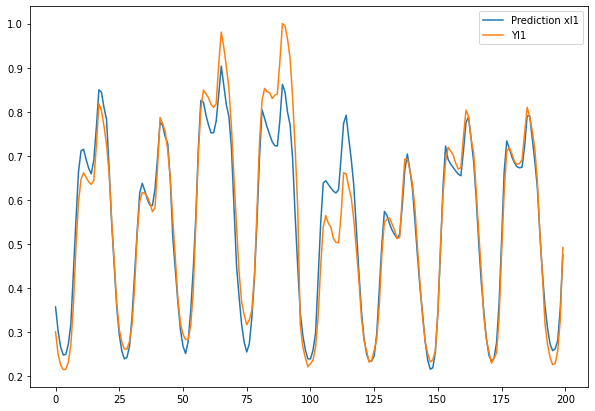

In [20]:
plt.figure(figsize=(10,7));
plt.plot(model.predict(xl[1])[:200]);
plt.plot(yl[1].to_numpy()[:200]);
plt.legend(['Prediction xl1','Yl1']);

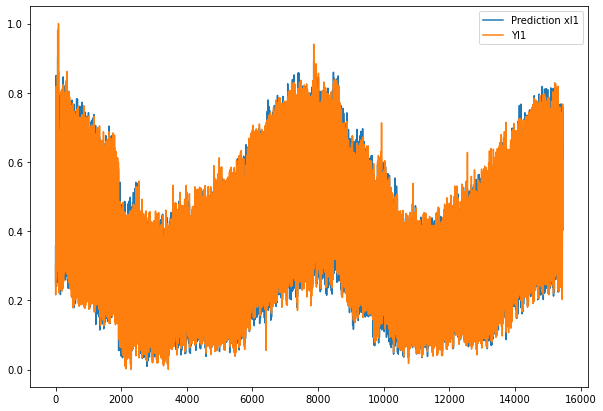

In [27]:
plt.figure(figsize=(10,7));
plt.plot(model.predict(xl[1]));
plt.plot(yl[1].to_numpy());
plt.legend(['Prediction xl1','Yl1']);

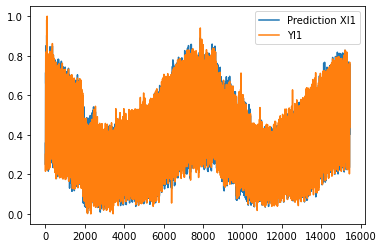

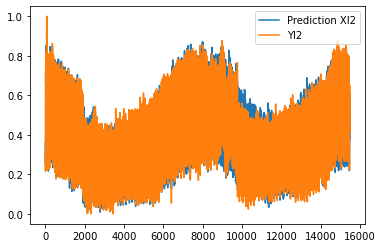

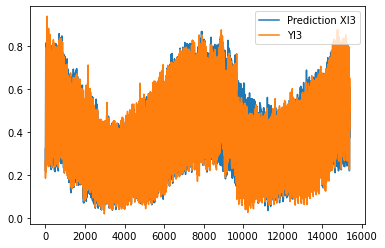

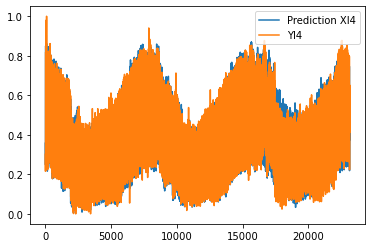

In [45]:
for i in range (5):
    if i!=0:
        plt.plot(model.predict(xl[i]));
        plt.plot(yl[i].to_numpy());
        plt.legend(['Prediction Xl{}'.format(i),'Yl{}'.format(i)]);
        plt.show();

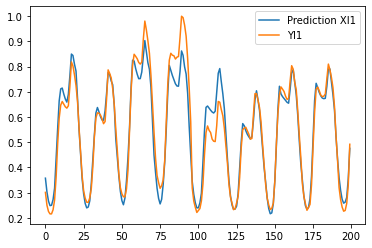

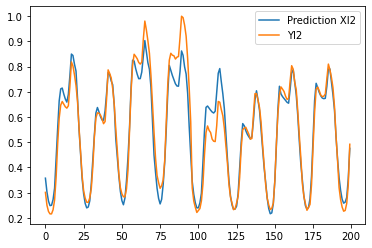

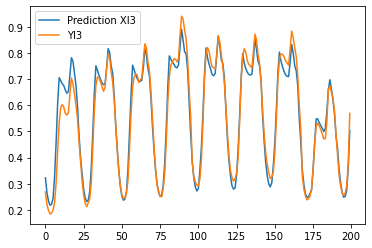

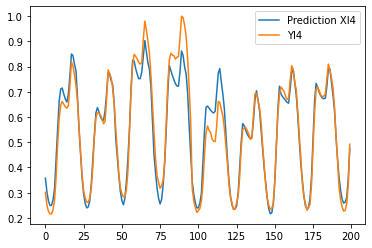

In [47]:
for i in range (5):
    if i!=0:
        plt.plot(model.predict(xl[i])[:200]);
        plt.plot(yl[i].to_numpy()[:200]);
        plt.legend(['Prediction Xl{}'.format(i),'Yl{}'.format(i)]);
        plt.show();

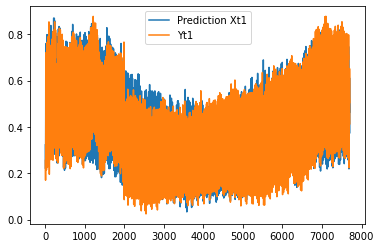

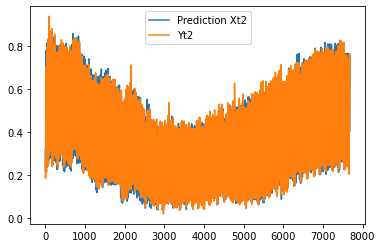

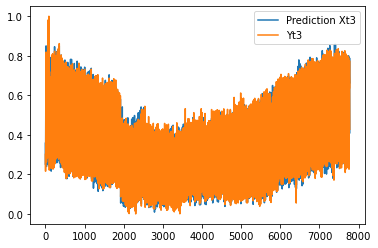

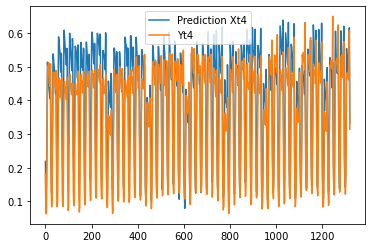

In [46]:
for i in range (5):
    if i!=0:
        plt.plot(model.predict(xt[i]));
        plt.plot(yt[i].to_numpy());
        plt.legend(['Prediction Xt{}'.format(i),'Yt{}'.format(i)]);
        plt.show();

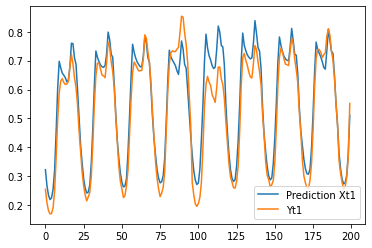

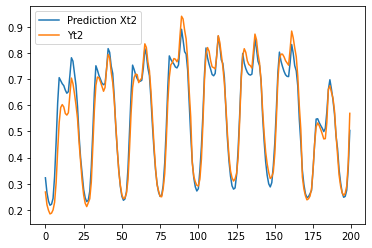

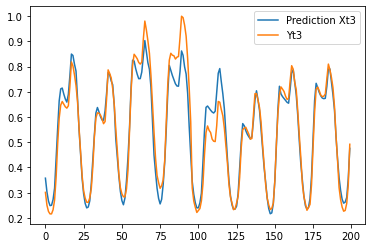

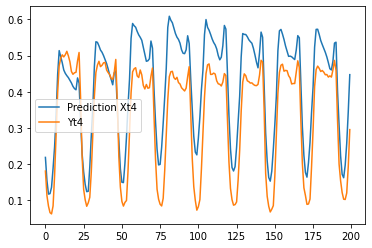

In [48]:
for i in range (5):
    if i!=0:
        plt.plot(model.predict(xt[i])[:200]);
        plt.plot(yt[i].to_numpy()[:200]);
        plt.legend(['Prediction Xt{}'.format(i),'Yt{}'.format(i)]);
        plt.show();

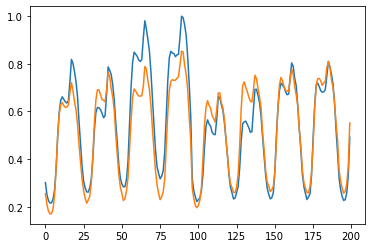

In [10]:
plt.plot(yl[1].to_numpy()[:200]);
plt.plot(yt[1].to_numpy()[:200]);

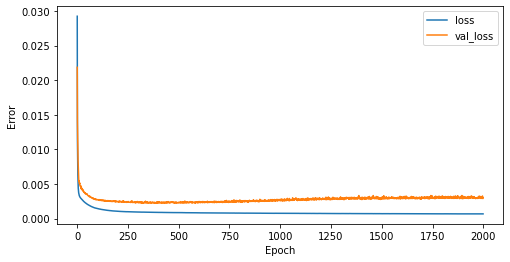

In [52]:
plt.figure(figsize=(8,4));
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.xlabel('Epoch');
plt.ylabel('Error');
plt.legend(['loss','val_loss']);

In [4]:
start = time()
history = model.fit(xl[1],yl[1],validation_data=(xt[1],yt[1]), epochs=10)
print('Total execution time: {} seconds'.format(time()-start))

Epoch 1/10
483/483 [==============================] - 13s 26ms/step - loss: 111.3779 - val_loss: 0.0170
Epoch 2/10
483/483 [==============================] - 13s 27ms/step - loss: 0.0117 - val_loss: 0.0121
Epoch 3/10
483/483 [==============================] - 13s 27ms/step - loss: 0.0090 - val_loss: 0.0145
Epoch 4/10
483/483 [==============================] - 14s 30ms/step - loss: 0.0075 - val_loss: 0.0093
Epoch 5/10
483/483 [==============================] - 13s 28ms/step - loss: 0.0064 - val_loss: 0.0077
Epoch 6/10
483/483 [==============================] - 13s 26ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 7/10
483/483 [==============================] - 12s 24ms/step - loss: 0.0050 - val_loss: 0.0084
Epoch 8/10
483/483 [==============================] - 11s 23ms/step - loss: 0.0050 - val_loss: 0.0077
Epoch 9/10
483/483 [==============================] - 12s 24ms/step - loss: 0.0046 - val_loss: 0.0055
Epoch 10/10
483/483 [==============================] - 11s 23ms/step - loss: 0.0

#### ADAM vs SGD

In [19]:
start = time()
history = model.fit(xl[1],yl[1],validation_data=(xt[1],yt[1]), epochs=2000)
print('Total execution time: {} seconds'.format(time()-start))

Epoch 1/2000
483/483 [==============================] - 0s 741us/step - loss: 0.0102 - val_loss: 0.0046
Epoch 2/2000
483/483 [==============================] - 0s 566us/step - loss: 0.0032 - val_loss: 0.0042
Epoch 3/2000
483/483 [==============================] - 0s 578us/step - loss: 0.0023 - val_loss: 0.0032
Epoch 4/2000
483/483 [==============================] - 0s 586us/step - loss: 0.0019 - val_loss: 0.0029
Epoch 5/2000
483/483 [==============================] - 0s 572us/step - loss: 0.0016 - val_loss: 0.0034
Epoch 6/2000
483/483 [==============================] - 0s 568us/step - loss: 0.0014 - val_loss: 0.0027
Epoch 7/2000
483/483 [==============================] - 0s 584us/step - loss: 0.0012 - val_loss: 0.0026
Epoch 8/2000
483/483 [==============================] - 0s 570us/step - loss: 0.0012 - val_loss: 0.0024
Epoch 9/2000
483/483 [==============================] - 0s 566us/step - loss: 0.0011 - val_loss: 0.0022
Epoch 10/2000
483/483 [==============================] - 0s 574u

483/483 [==============================] - 0s 564us/step - loss: 7.7203e-04 - val_loss: 0.0027
Epoch 77/2000
483/483 [==============================] - 0s 558us/step - loss: 7.4812e-04 - val_loss: 0.0032
Epoch 78/2000
483/483 [==============================] - 0s 560us/step - loss: 7.5574e-04 - val_loss: 0.0034
Epoch 79/2000
483/483 [==============================] - 0s 551us/step - loss: 7.3738e-04 - val_loss: 0.0027
Epoch 80/2000
483/483 [==============================] - 0s 564us/step - loss: 7.5790e-04 - val_loss: 0.0034
Epoch 81/2000
483/483 [==============================] - 0s 560us/step - loss: 7.3159e-04 - val_loss: 0.0031
Epoch 82/2000
483/483 [==============================] - 0s 558us/step - loss: 7.3053e-04 - val_loss: 0.0036
Epoch 83/2000
483/483 [==============================] - 0s 560us/step - loss: 7.4313e-04 - val_loss: 0.0026
Epoch 84/2000
483/483 [==============================] - 0s 562us/step - loss: 7.2744e-04 - val_loss: 0.0033
Epoch 85/2000
483/483 [==========

Epoch 151/2000
483/483 [==============================] - 0s 580us/step - loss: 6.8364e-04 - val_loss: 0.0025
Epoch 152/2000
483/483 [==============================] - 0s 560us/step - loss: 6.8030e-04 - val_loss: 0.0026
Epoch 153/2000
483/483 [==============================] - 0s 622us/step - loss: 7.0849e-04 - val_loss: 0.0025
Epoch 154/2000
483/483 [==============================] - 0s 555us/step - loss: 7.2489e-04 - val_loss: 0.0039
Epoch 155/2000
483/483 [==============================] - 0s 559us/step - loss: 7.0019e-04 - val_loss: 0.0026
Epoch 156/2000
483/483 [==============================] - 0s 559us/step - loss: 7.2586e-04 - val_loss: 0.0026
Epoch 157/2000
483/483 [==============================] - 0s 611us/step - loss: 7.0610e-04 - val_loss: 0.0029
Epoch 158/2000
483/483 [==============================] - 0s 564us/step - loss: 7.3761e-04 - val_loss: 0.0029
Epoch 159/2000
483/483 [==============================] - 0s 558us/step - loss: 6.8737e-04 - val_loss: 0.0031
Epoch 160/

483/483 [==============================] - 0s 590us/step - loss: 7.0336e-04 - val_loss: 0.0037
Epoch 226/2000
483/483 [==============================] - 0s 573us/step - loss: 7.0388e-04 - val_loss: 0.0032
Epoch 227/2000
483/483 [==============================] - 0s 564us/step - loss: 6.7484e-04 - val_loss: 0.0049
Epoch 228/2000
483/483 [==============================] - 0s 560us/step - loss: 7.2914e-04 - val_loss: 0.0034
Epoch 229/2000
483/483 [==============================] - 0s 554us/step - loss: 6.6794e-04 - val_loss: 0.0033
Epoch 230/2000
483/483 [==============================] - 0s 582us/step - loss: 7.0383e-04 - val_loss: 0.0029
Epoch 231/2000
483/483 [==============================] - 0s 582us/step - loss: 7.3214e-04 - val_loss: 0.0032
Epoch 232/2000
483/483 [==============================] - 0s 560us/step - loss: 7.0950e-04 - val_loss: 0.0032
Epoch 233/2000
483/483 [==============================] - 0s 560us/step - loss: 6.8477e-04 - val_loss: 0.0031
Epoch 234/2000
483/483 [=

483/483 [==============================] - 0s 563us/step - loss: 6.5843e-04 - val_loss: 0.0031
Epoch 300/2000
483/483 [==============================] - 0s 558us/step - loss: 6.7125e-04 - val_loss: 0.0036
Epoch 301/2000
483/483 [==============================] - 0s 566us/step - loss: 6.7999e-04 - val_loss: 0.0047
Epoch 302/2000
483/483 [==============================] - 0s 540us/step - loss: 7.1258e-04 - val_loss: 0.0042
Epoch 303/2000
483/483 [==============================] - 0s 593us/step - loss: 7.0865e-04 - val_loss: 0.0032
Epoch 304/2000
483/483 [==============================] - 0s 593us/step - loss: 6.5720e-04 - val_loss: 0.0050
Epoch 305/2000
483/483 [==============================] - 0s 578us/step - loss: 6.6953e-04 - val_loss: 0.0036
Epoch 306/2000
483/483 [==============================] - 0s 558us/step - loss: 6.9361e-04 - val_loss: 0.0036
Epoch 307/2000
483/483 [==============================] - 0s 560us/step - loss: 6.8417e-04 - val_loss: 0.0033
Epoch 308/2000
483/483 [=

483/483 [==============================] - 0s 558us/step - loss: 6.3834e-04 - val_loss: 0.0032
Epoch 374/2000
483/483 [==============================] - 0s 558us/step - loss: 6.5787e-04 - val_loss: 0.0033
Epoch 375/2000
483/483 [==============================] - 0s 562us/step - loss: 6.8883e-04 - val_loss: 0.0041
Epoch 376/2000
483/483 [==============================] - 0s 568us/step - loss: 6.8015e-04 - val_loss: 0.0028
Epoch 377/2000
483/483 [==============================] - 0s 562us/step - loss: 7.2880e-04 - val_loss: 0.0030
Epoch 378/2000
483/483 [==============================] - 0s 584us/step - loss: 7.1180e-04 - val_loss: 0.0031
Epoch 379/2000
483/483 [==============================] - 0s 564us/step - loss: 6.5720e-04 - val_loss: 0.0031
Epoch 380/2000
483/483 [==============================] - 0s 562us/step - loss: 6.9035e-04 - val_loss: 0.0030
Epoch 381/2000
483/483 [==============================] - 0s 564us/step - loss: 6.5798e-04 - val_loss: 0.0032
Epoch 382/2000
483/483 [=

483/483 [==============================] - 0s 562us/step - loss: 6.7442e-04 - val_loss: 0.0028
Epoch 448/2000
483/483 [==============================] - 0s 555us/step - loss: 6.8152e-04 - val_loss: 0.0028
Epoch 449/2000
483/483 [==============================] - 0s 568us/step - loss: 6.5778e-04 - val_loss: 0.0030
Epoch 450/2000
483/483 [==============================] - 0s 562us/step - loss: 6.8079e-04 - val_loss: 0.0027
Epoch 451/2000
483/483 [==============================] - 0s 562us/step - loss: 6.6254e-04 - val_loss: 0.0026
Epoch 452/2000
483/483 [==============================] - 0s 584us/step - loss: 6.7732e-04 - val_loss: 0.0029
Epoch 453/2000
483/483 [==============================] - 0s 562us/step - loss: 7.2425e-04 - val_loss: 0.0038
Epoch 454/2000
483/483 [==============================] - 0s 562us/step - loss: 7.2673e-04 - val_loss: 0.0028
Epoch 455/2000
483/483 [==============================] - 0s 555us/step - loss: 6.7116e-04 - val_loss: 0.0025
Epoch 456/2000
483/483 [=

483/483 [==============================] - 0s 562us/step - loss: 6.6702e-04 - val_loss: 0.0032
Epoch 522/2000
483/483 [==============================] - 0s 558us/step - loss: 6.8380e-04 - val_loss: 0.0034
Epoch 523/2000
483/483 [==============================] - 0s 562us/step - loss: 6.7687e-04 - val_loss: 0.0028
Epoch 524/2000
483/483 [==============================] - 0s 570us/step - loss: 6.6151e-04 - val_loss: 0.0028
Epoch 525/2000
483/483 [==============================] - 0s 560us/step - loss: 6.5465e-04 - val_loss: 0.0030
Epoch 526/2000
483/483 [==============================] - 0s 593us/step - loss: 6.9639e-04 - val_loss: 0.0028
Epoch 527/2000
483/483 [==============================] - 0s 564us/step - loss: 6.8028e-04 - val_loss: 0.0030
Epoch 528/2000
483/483 [==============================] - 0s 553us/step - loss: 6.9024e-04 - val_loss: 0.0026
Epoch 529/2000
483/483 [==============================] - 0s 558us/step - loss: 6.9126e-04 - val_loss: 0.0029
Epoch 530/2000
483/483 [=

483/483 [==============================] - 0s 601us/step - loss: 6.7618e-04 - val_loss: 0.0031
Epoch 596/2000
483/483 [==============================] - 0s 556us/step - loss: 6.7833e-04 - val_loss: 0.0033
Epoch 597/2000
483/483 [==============================] - 0s 544us/step - loss: 6.5735e-04 - val_loss: 0.0028
Epoch 598/2000
483/483 [==============================] - 0s 590us/step - loss: 6.5345e-04 - val_loss: 0.0034
Epoch 599/2000
483/483 [==============================] - 0s 598us/step - loss: 6.7105e-04 - val_loss: 0.0033
Epoch 600/2000
483/483 [==============================] - 0s 564us/step - loss: 6.7022e-04 - val_loss: 0.0028
Epoch 601/2000
483/483 [==============================] - 0s 560us/step - loss: 6.6859e-04 - val_loss: 0.0030
Epoch 602/2000
483/483 [==============================] - 0s 553us/step - loss: 7.1273e-04 - val_loss: 0.0033
Epoch 603/2000
483/483 [==============================] - 0s 530us/step - loss: 6.6292e-04 - val_loss: 0.0030
Epoch 604/2000
483/483 [=

483/483 [==============================] - 0s 564us/step - loss: 7.1303e-04 - val_loss: 0.0049
Epoch 670/2000
483/483 [==============================] - 0s 562us/step - loss: 7.0885e-04 - val_loss: 0.0037
Epoch 671/2000
483/483 [==============================] - 0s 566us/step - loss: 6.3756e-04 - val_loss: 0.0036
Epoch 672/2000
483/483 [==============================] - 0s 560us/step - loss: 6.2924e-04 - val_loss: 0.0037
Epoch 673/2000
483/483 [==============================] - 0s 580us/step - loss: 6.4937e-04 - val_loss: 0.0037
Epoch 674/2000
483/483 [==============================] - 0s 560us/step - loss: 6.6066e-04 - val_loss: 0.0027
Epoch 675/2000
483/483 [==============================] - 0s 555us/step - loss: 6.4275e-04 - val_loss: 0.0031
Epoch 676/2000
483/483 [==============================] - 0s 535us/step - loss: 6.6378e-04 - val_loss: 0.0044
Epoch 677/2000
483/483 [==============================] - 0s 577us/step - loss: 6.6681e-04 - val_loss: 0.0038
Epoch 678/2000
483/483 [=

483/483 [==============================] - 0s 543us/step - loss: 6.7261e-04 - val_loss: 0.0033
Epoch 744/2000
483/483 [==============================] - 0s 590us/step - loss: 6.7121e-04 - val_loss: 0.0034
Epoch 745/2000
483/483 [==============================] - 0s 577us/step - loss: 6.7081e-04 - val_loss: 0.0038
Epoch 746/2000
483/483 [==============================] - 0s 563us/step - loss: 6.4038e-04 - val_loss: 0.0032
Epoch 747/2000
483/483 [==============================] - 0s 591us/step - loss: 6.7393e-04 - val_loss: 0.0041
Epoch 748/2000
483/483 [==============================] - 0s 562us/step - loss: 6.5131e-04 - val_loss: 0.0031
Epoch 749/2000
483/483 [==============================] - 0s 562us/step - loss: 6.6636e-04 - val_loss: 0.0037
Epoch 750/2000
483/483 [==============================] - 0s 566us/step - loss: 7.2429e-04 - val_loss: 0.0033
Epoch 751/2000
483/483 [==============================] - 0s 558us/step - loss: 6.4899e-04 - val_loss: 0.0030
Epoch 752/2000
483/483 [=

483/483 [==============================] - 0s 566us/step - loss: 6.9209e-04 - val_loss: 0.0035
Epoch 818/2000
483/483 [==============================] - 0s 560us/step - loss: 6.5022e-04 - val_loss: 0.0036
Epoch 819/2000
483/483 [==============================] - 0s 562us/step - loss: 6.7541e-04 - val_loss: 0.0028
Epoch 820/2000
483/483 [==============================] - 0s 562us/step - loss: 6.6325e-04 - val_loss: 0.0031
Epoch 821/2000
483/483 [==============================] - 0s 588us/step - loss: 6.8031e-04 - val_loss: 0.0036
Epoch 822/2000
483/483 [==============================] - 0s 555us/step - loss: 6.4918e-04 - val_loss: 0.0035
Epoch 823/2000
483/483 [==============================] - 0s 560us/step - loss: 6.4638e-04 - val_loss: 0.0040
Epoch 824/2000
483/483 [==============================] - 0s 560us/step - loss: 6.5284e-04 - val_loss: 0.0030
Epoch 825/2000
483/483 [==============================] - 0s 558us/step - loss: 6.7991e-04 - val_loss: 0.0032
Epoch 826/2000
483/483 [=

483/483 [==============================] - 0s 590us/step - loss: 6.5608e-04 - val_loss: 0.0033
Epoch 892/2000
483/483 [==============================] - 0s 564us/step - loss: 6.8322e-04 - val_loss: 0.0036
Epoch 893/2000
483/483 [==============================] - 0s 553us/step - loss: 6.3902e-04 - val_loss: 0.0036
Epoch 894/2000
483/483 [==============================] - 0s 564us/step - loss: 6.4914e-04 - val_loss: 0.0033
Epoch 895/2000
483/483 [==============================] - 0s 593us/step - loss: 6.7586e-04 - val_loss: 0.0027
Epoch 896/2000
483/483 [==============================] - 0s 529us/step - loss: 6.4852e-04 - val_loss: 0.0032
Epoch 897/2000
483/483 [==============================] - 0s 544us/step - loss: 6.4903e-04 - val_loss: 0.0045
Epoch 898/2000
483/483 [==============================] - 0s 557us/step - loss: 6.5121e-04 - val_loss: 0.0032
Epoch 899/2000
483/483 [==============================] - 0s 558us/step - loss: 7.0989e-04 - val_loss: 0.0033
Epoch 900/2000
483/483 [=

483/483 [==============================] - 0s 570us/step - loss: 6.4493e-04 - val_loss: 0.0034
Epoch 966/2000
483/483 [==============================] - 0s 555us/step - loss: 6.4055e-04 - val_loss: 0.0029
Epoch 967/2000
483/483 [==============================] - 0s 560us/step - loss: 6.8398e-04 - val_loss: 0.0031
Epoch 968/2000
483/483 [==============================] - 0s 572us/step - loss: 6.9148e-04 - val_loss: 0.0037
Epoch 969/2000
483/483 [==============================] - 0s 551us/step - loss: 6.5573e-04 - val_loss: 0.0034
Epoch 970/2000
483/483 [==============================] - 0s 577us/step - loss: 6.7961e-04 - val_loss: 0.0034
Epoch 971/2000
483/483 [==============================] - 0s 558us/step - loss: 6.3938e-04 - val_loss: 0.0034
Epoch 972/2000
483/483 [==============================] - 0s 558us/step - loss: 6.4185e-04 - val_loss: 0.0031
Epoch 973/2000
483/483 [==============================] - 0s 576us/step - loss: 6.4342e-04 - val_loss: 0.0033
Epoch 974/2000
483/483 [=

483/483 [==============================] - 0s 583us/step - loss: 6.4587e-04 - val_loss: 0.0024
Epoch 1040/2000
483/483 [==============================] - 0s 566us/step - loss: 6.6802e-04 - val_loss: 0.0027
Epoch 1041/2000
483/483 [==============================] - 0s 564us/step - loss: 6.8497e-04 - val_loss: 0.0031
Epoch 1042/2000
483/483 [==============================] - 0s 584us/step - loss: 6.5004e-04 - val_loss: 0.0037
Epoch 1043/2000
483/483 [==============================] - 0s 545us/step - loss: 6.5927e-04 - val_loss: 0.0036
Epoch 1044/2000
483/483 [==============================] - 0s 557us/step - loss: 6.5346e-04 - val_loss: 0.0031
Epoch 1045/2000
483/483 [==============================] - 0s 577us/step - loss: 6.8188e-04 - val_loss: 0.0032
Epoch 1046/2000
483/483 [==============================] - 0s 558us/step - loss: 6.6374e-04 - val_loss: 0.0032
Epoch 1047/2000
483/483 [==============================] - 0s 558us/step - loss: 6.6357e-04 - val_loss: 0.0034
Epoch 1048/2000
4

Epoch 1113/2000
483/483 [==============================] - 0s 626us/step - loss: 6.5188e-04 - val_loss: 0.0030
Epoch 1114/2000
483/483 [==============================] - 0s 624us/step - loss: 6.6749e-04 - val_loss: 0.0034
Epoch 1115/2000
483/483 [==============================] - 0s 622us/step - loss: 6.2731e-04 - val_loss: 0.0032
Epoch 1116/2000
483/483 [==============================] - 0s 623us/step - loss: 6.8401e-04 - val_loss: 0.0070
Epoch 1117/2000
483/483 [==============================] - 0s 622us/step - loss: 7.0962e-04 - val_loss: 0.0031
Epoch 1118/2000
483/483 [==============================] - 0s 623us/step - loss: 6.4621e-04 - val_loss: 0.0031
Epoch 1119/2000
483/483 [==============================] - 0s 623us/step - loss: 6.6748e-04 - val_loss: 0.0030
Epoch 1120/2000
483/483 [==============================] - 0s 633us/step - loss: 6.5914e-04 - val_loss: 0.0031
Epoch 1121/2000
483/483 [==============================] - 0s 611us/step - loss: 6.5827e-04 - val_loss: 0.0029
E

Epoch 1187/2000
483/483 [==============================] - 0s 564us/step - loss: 6.6549e-04 - val_loss: 0.0031
Epoch 1188/2000
483/483 [==============================] - 0s 560us/step - loss: 7.0237e-04 - val_loss: 0.0025
Epoch 1189/2000
483/483 [==============================] - 0s 570us/step - loss: 6.4043e-04 - val_loss: 0.0031
Epoch 1190/2000
483/483 [==============================] - 0s 536us/step - loss: 7.3750e-04 - val_loss: 0.0026
Epoch 1191/2000
483/483 [==============================] - 0s 561us/step - loss: 6.4142e-04 - val_loss: 0.0029
Epoch 1192/2000
483/483 [==============================] - 0s 557us/step - loss: 6.5462e-04 - val_loss: 0.0034
Epoch 1193/2000
483/483 [==============================] - 0s 570us/step - loss: 6.6510e-04 - val_loss: 0.0035
Epoch 1194/2000
483/483 [==============================] - 0s 555us/step - loss: 6.8633e-04 - val_loss: 0.0034
Epoch 1195/2000
483/483 [==============================] - 0s 558us/step - loss: 6.4064e-04 - val_loss: 0.0029
E

Epoch 1261/2000
483/483 [==============================] - 0s 560us/step - loss: 6.4211e-04 - val_loss: 0.0032
Epoch 1262/2000
483/483 [==============================] - 0s 562us/step - loss: 6.7886e-04 - val_loss: 0.0029
Epoch 1263/2000
483/483 [==============================] - 0s 563us/step - loss: 6.6742e-04 - val_loss: 0.0030
Epoch 1264/2000
483/483 [==============================] - 0s 549us/step - loss: 6.4736e-04 - val_loss: 0.0038
Epoch 1265/2000
483/483 [==============================] - 0s 557us/step - loss: 7.4185e-04 - val_loss: 0.0032
Epoch 1266/2000
483/483 [==============================] - 0s 544us/step - loss: 6.5571e-04 - val_loss: 0.0032
Epoch 1267/2000
483/483 [==============================] - 0s 566us/step - loss: 6.6053e-04 - val_loss: 0.0035
Epoch 1268/2000
483/483 [==============================] - 0s 560us/step - loss: 6.4160e-04 - val_loss: 0.0043
Epoch 1269/2000
483/483 [==============================] - 0s 558us/step - loss: 6.5757e-04 - val_loss: 0.0032
E

Epoch 1335/2000
483/483 [==============================] - 0s 558us/step - loss: 6.7801e-04 - val_loss: 0.0028
Epoch 1336/2000
483/483 [==============================] - 0s 580us/step - loss: 6.8104e-04 - val_loss: 0.0036
Epoch 1337/2000
483/483 [==============================] - 0s 553us/step - loss: 6.3919e-04 - val_loss: 0.0033
Epoch 1338/2000
483/483 [==============================] - 0s 556us/step - loss: 6.7096e-04 - val_loss: 0.0033
Epoch 1339/2000
483/483 [==============================] - 0s 558us/step - loss: 6.8684e-04 - val_loss: 0.0037
Epoch 1340/2000
483/483 [==============================] - 0s 579us/step - loss: 6.5752e-04 - val_loss: 0.0029
Epoch 1341/2000
483/483 [==============================] - 0s 558us/step - loss: 6.7056e-04 - val_loss: 0.0036
Epoch 1342/2000
483/483 [==============================] - 0s 560us/step - loss: 6.8822e-04 - val_loss: 0.0033
Epoch 1343/2000
483/483 [==============================] - 0s 564us/step - loss: 6.9343e-04 - val_loss: 0.0041
E

Epoch 1409/2000
483/483 [==============================] - 0s 562us/step - loss: 6.7668e-04 - val_loss: 0.0036
Epoch 1410/2000
483/483 [==============================] - 0s 560us/step - loss: 6.5494e-04 - val_loss: 0.0031
Epoch 1411/2000
483/483 [==============================] - 0s 554us/step - loss: 6.9658e-04 - val_loss: 0.0031
Epoch 1412/2000
483/483 [==============================] - 0s 544us/step - loss: 7.8767e-04 - val_loss: 0.0039
Epoch 1413/2000
483/483 [==============================] - 0s 589us/step - loss: 6.8815e-04 - val_loss: 0.0032
Epoch 1414/2000
483/483 [==============================] - 0s 568us/step - loss: 6.6040e-04 - val_loss: 0.0031
Epoch 1415/2000
483/483 [==============================] - 0s 560us/step - loss: 6.9812e-04 - val_loss: 0.0033
Epoch 1416/2000
483/483 [==============================] - 0s 558us/step - loss: 6.7780e-04 - val_loss: 0.0035
Epoch 1417/2000
483/483 [==============================] - 0s 562us/step - loss: 7.5994e-04 - val_loss: 0.0033
E

Epoch 1483/2000
483/483 [==============================] - 0s 564us/step - loss: 7.2131e-04 - val_loss: 0.0031
Epoch 1484/2000
483/483 [==============================] - 0s 531us/step - loss: 7.3487e-04 - val_loss: 0.0034
Epoch 1485/2000
483/483 [==============================] - 0s 584us/step - loss: 7.1747e-04 - val_loss: 0.0029
Epoch 1486/2000
483/483 [==============================] - 0s 577us/step - loss: 7.3510e-04 - val_loss: 0.0031
Epoch 1487/2000
483/483 [==============================] - 0s 560us/step - loss: 7.6176e-04 - val_loss: 0.0029
Epoch 1488/2000
483/483 [==============================] - 0s 558us/step - loss: 6.9471e-04 - val_loss: 0.0027
Epoch 1489/2000
483/483 [==============================] - 0s 554us/step - loss: 7.0132e-04 - val_loss: 0.0025
Epoch 1490/2000
483/483 [==============================] - 0s 570us/step - loss: 6.9818e-04 - val_loss: 0.0029
Epoch 1491/2000
483/483 [==============================] - 0s 555us/step - loss: 6.7509e-04 - val_loss: 0.0027
E

Epoch 1557/2000
483/483 [==============================] - 0s 560us/step - loss: 7.3140e-04 - val_loss: 0.0029
Epoch 1558/2000
483/483 [==============================] - 0s 552us/step - loss: 6.5076e-04 - val_loss: 0.0030
Epoch 1559/2000
483/483 [==============================] - 0s 558us/step - loss: 6.8484e-04 - val_loss: 0.0030
Epoch 1560/2000
483/483 [==============================] - 0s 585us/step - loss: 7.0840e-04 - val_loss: 0.0030
Epoch 1561/2000
483/483 [==============================] - 0s 562us/step - loss: 6.5413e-04 - val_loss: 0.0031
Epoch 1562/2000
483/483 [==============================] - 0s 560us/step - loss: 6.8264e-04 - val_loss: 0.0030
Epoch 1563/2000
483/483 [==============================] - 0s 562us/step - loss: 6.8386e-04 - val_loss: 0.0022
Epoch 1564/2000
483/483 [==============================] - 0s 576us/step - loss: 6.9244e-04 - val_loss: 0.0031
Epoch 1565/2000
483/483 [==============================] - 0s 529us/step - loss: 7.0200e-04 - val_loss: 0.0031
E

Epoch 1631/2000
483/483 [==============================] - 0s 562us/step - loss: 6.6475e-04 - val_loss: 0.0033
Epoch 1632/2000
483/483 [==============================] - 0s 555us/step - loss: 6.7097e-04 - val_loss: 0.0029
Epoch 1633/2000
483/483 [==============================] - 0s 559us/step - loss: 6.4992e-04 - val_loss: 0.0030
Epoch 1634/2000
483/483 [==============================] - 0s 568us/step - loss: 6.6315e-04 - val_loss: 0.0028
Epoch 1635/2000
483/483 [==============================] - 0s 568us/step - loss: 6.8235e-04 - val_loss: 0.0043
Epoch 1636/2000
483/483 [==============================] - 0s 568us/step - loss: 6.7186e-04 - val_loss: 0.0029
Epoch 1637/2000
483/483 [==============================] - 0s 566us/step - loss: 6.5186e-04 - val_loss: 0.0027
Epoch 1638/2000
483/483 [==============================] - 0s 538us/step - loss: 6.6871e-04 - val_loss: 0.0027
Epoch 1639/2000
483/483 [==============================] - 0s 569us/step - loss: 6.9659e-04 - val_loss: 0.0027
E

Epoch 1705/2000
483/483 [==============================] - 0s 538us/step - loss: 6.7063e-04 - val_loss: 0.0034
Epoch 1706/2000
483/483 [==============================] - 0s 587us/step - loss: 6.9304e-04 - val_loss: 0.0029
Epoch 1707/2000
483/483 [==============================] - 0s 560us/step - loss: 6.6352e-04 - val_loss: 0.0027
Epoch 1708/2000
483/483 [==============================] - 0s 562us/step - loss: 7.1379e-04 - val_loss: 0.0035
Epoch 1709/2000
483/483 [==============================] - 0s 558us/step - loss: 6.7662e-04 - val_loss: 0.0029
Epoch 1710/2000
483/483 [==============================] - 0s 560us/step - loss: 6.2988e-04 - val_loss: 0.0035
Epoch 1711/2000
483/483 [==============================] - 0s 564us/step - loss: 6.5493e-04 - val_loss: 0.0028
Epoch 1712/2000
483/483 [==============================] - 0s 547us/step - loss: 6.6592e-04 - val_loss: 0.0026
Epoch 1713/2000
483/483 [==============================] - 0s 558us/step - loss: 6.4876e-04 - val_loss: 0.0029
E

Epoch 1779/2000
483/483 [==============================] - 0s 544us/step - loss: 6.8029e-04 - val_loss: 0.0030
Epoch 1780/2000
483/483 [==============================] - 0s 557us/step - loss: 6.4704e-04 - val_loss: 0.0032
Epoch 1781/2000
483/483 [==============================] - 0s 558us/step - loss: 6.5402e-04 - val_loss: 0.0032
Epoch 1782/2000
483/483 [==============================] - 0s 577us/step - loss: 7.1534e-04 - val_loss: 0.0030
Epoch 1783/2000
483/483 [==============================] - 0s 573us/step - loss: 6.7269e-04 - val_loss: 0.0033
Epoch 1784/2000
483/483 [==============================] - 0s 570us/step - loss: 6.5836e-04 - val_loss: 0.0028
Epoch 1785/2000
483/483 [==============================] - 0s 563us/step - loss: 6.6327e-04 - val_loss: 0.0036
Epoch 1786/2000
483/483 [==============================] - 0s 544us/step - loss: 6.6299e-04 - val_loss: 0.0036
Epoch 1787/2000
483/483 [==============================] - 0s 582us/step - loss: 6.5763e-04 - val_loss: 0.0025
E

Epoch 1853/2000
483/483 [==============================] - 0s 572us/step - loss: 6.6430e-04 - val_loss: 0.0031
Epoch 1854/2000
483/483 [==============================] - 0s 568us/step - loss: 6.7272e-04 - val_loss: 0.0027
Epoch 1855/2000
483/483 [==============================] - 0s 574us/step - loss: 6.8028e-04 - val_loss: 0.0028
Epoch 1856/2000
483/483 [==============================] - 0s 553us/step - loss: 6.5236e-04 - val_loss: 0.0033
Epoch 1857/2000
483/483 [==============================] - 0s 564us/step - loss: 6.4245e-04 - val_loss: 0.0031
Epoch 1858/2000
483/483 [==============================] - 0s 572us/step - loss: 6.5422e-04 - val_loss: 0.0032
Epoch 1859/2000
483/483 [==============================] - 0s 534us/step - loss: 6.7889e-04 - val_loss: 0.0030
Epoch 1860/2000
483/483 [==============================] - 0s 588us/step - loss: 6.4693e-04 - val_loss: 0.0038
Epoch 1861/2000
483/483 [==============================] - 0s 560us/step - loss: 6.4516e-04 - val_loss: 0.0029
E

Epoch 1927/2000
483/483 [==============================] - 0s 562us/step - loss: 6.6413e-04 - val_loss: 0.0028
Epoch 1928/2000
483/483 [==============================] - 0s 562us/step - loss: 6.7678e-04 - val_loss: 0.0027
Epoch 1929/2000
483/483 [==============================] - 0s 560us/step - loss: 6.6706e-04 - val_loss: 0.0035
Epoch 1930/2000
483/483 [==============================] - 0s 556us/step - loss: 6.6170e-04 - val_loss: 0.0036
Epoch 1931/2000
483/483 [==============================] - 0s 544us/step - loss: 6.6097e-04 - val_loss: 0.0029
Epoch 1932/2000
483/483 [==============================] - 0s 563us/step - loss: 6.5318e-04 - val_loss: 0.0028
Epoch 1933/2000
483/483 [==============================] - 0s 585us/step - loss: 7.2194e-04 - val_loss: 0.0032
Epoch 1934/2000
483/483 [==============================] - 0s 560us/step - loss: 6.8461e-04 - val_loss: 0.0030
Epoch 1935/2000
483/483 [==============================] - 0s 557us/step - loss: 6.7557e-04 - val_loss: 0.0030
E

Total execution time: 549.2777655124664 seconds


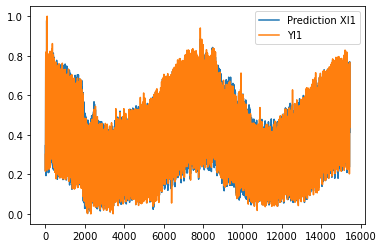

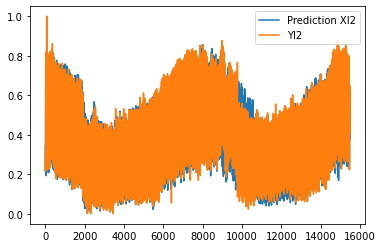

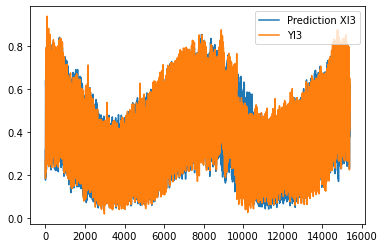

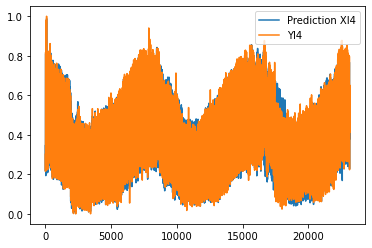

In [20]:
for i in range (5):
    if i!=0:
        plt.plot(model.predict(xl[i]));
        plt.plot(yl[i].to_numpy());
        plt.legend(['Prediction Xl{}'.format(i),'Yl{}'.format(i)]);
        plt.show();

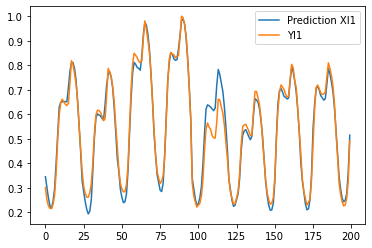

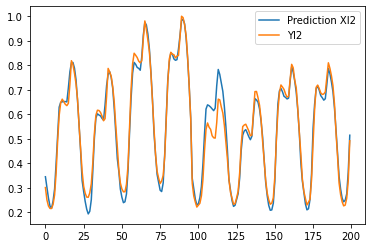

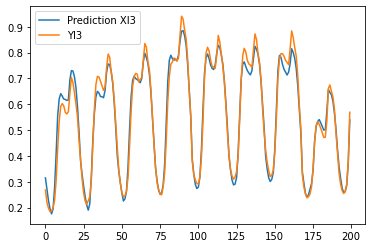

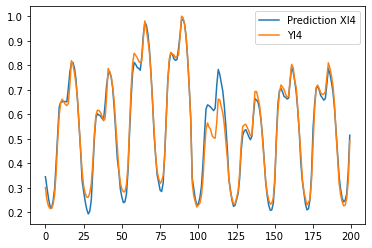

In [21]:
for i in range (5):
    if i!=0:
        plt.plot(model.predict(xl[i])[:200]);
        plt.plot(yl[i].to_numpy()[:200]);
        plt.legend(['Prediction Xl{}'.format(i),'Yl{}'.format(i)]);
        plt.show();

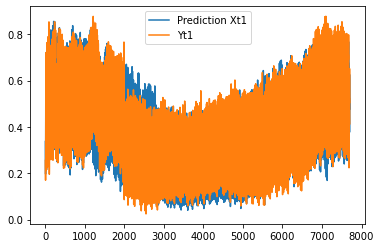

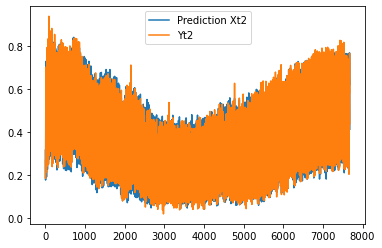

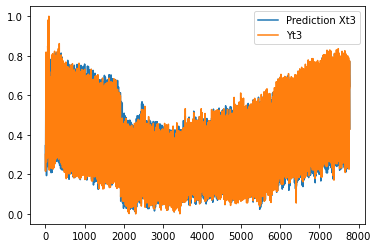

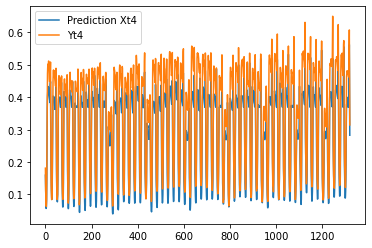

In [22]:
for i in range (5):
    if i!=0:
        plt.plot(model.predict(xt[i]));
        plt.plot(yt[i].to_numpy());
        plt.legend(['Prediction Xt{}'.format(i),'Yt{}'.format(i)]);
        plt.show();

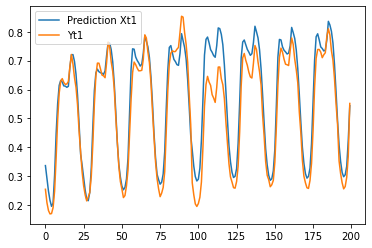

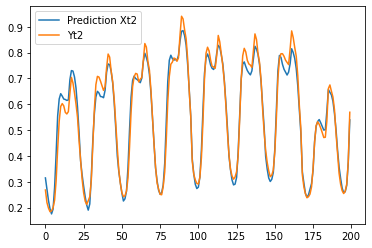

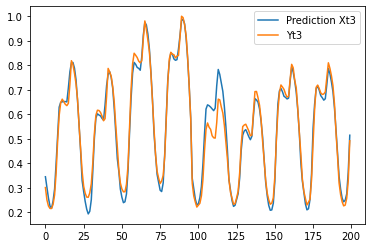

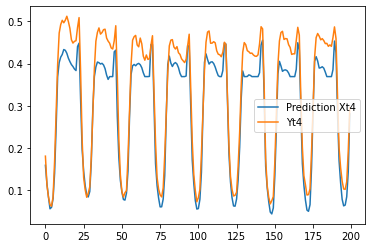

In [23]:
for i in range (5):
    if i!=0:
        plt.plot(model.predict(xt[i])[:200]);
        plt.plot(yt[i].to_numpy()[:200]);
        plt.legend(['Prediction Xt{}'.format(i),'Yt{}'.format(i)]);
        plt.show();

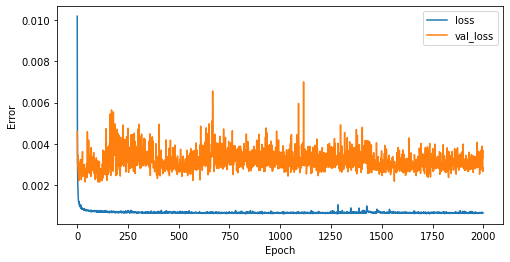

In [24]:
plt.figure(figsize=(8,4));
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.xlabel('Epoch');
plt.ylabel('Error');
plt.legend(['loss','val_loss']);

#### Hidden layer

In [26]:
start = time()
history = model.fit(xl[1],yl[1],validation_data=(xt[1],yt[1]), epochs=2000)
print('Total execution time: {} seconds'.format(time()-start))

Epoch 1/2000
483/483 [==============================] - 0s 765us/step - loss: 0.0125 - val_loss: 0.0047
Epoch 2/2000
483/483 [==============================] - 0s 623us/step - loss: 0.0029 - val_loss: 0.0036
Epoch 3/2000
483/483 [==============================] - 0s 606us/step - loss: 0.0023 - val_loss: 0.0031
Epoch 4/2000
483/483 [==============================] - 0s 557us/step - loss: 0.0020 - val_loss: 0.0027
Epoch 5/2000
483/483 [==============================] - 0s 558us/step - loss: 0.0019 - val_loss: 0.0029
Epoch 6/2000
483/483 [==============================] - 0s 590us/step - loss: 0.0016 - val_loss: 0.0027
Epoch 7/2000
483/483 [==============================] - 0s 614us/step - loss: 0.0014 - val_loss: 0.0025
Epoch 8/2000
483/483 [==============================] - 0s 597us/step - loss: 0.0013 - val_loss: 0.0028
Epoch 9/2000
483/483 [==============================] - 0s 591us/step - loss: 0.0012 - val_loss: 0.0023
Epoch 10/2000
483/483 [==============================] - 0s 593u

Epoch 77/2000
483/483 [==============================] - 0s 599us/step - loss: 6.8209e-04 - val_loss: 0.0028
Epoch 78/2000
483/483 [==============================] - 0s 559us/step - loss: 6.6290e-04 - val_loss: 0.0030
Epoch 79/2000
483/483 [==============================] - 0s 598us/step - loss: 6.7283e-04 - val_loss: 0.0029
Epoch 80/2000
483/483 [==============================] - 0s 578us/step - loss: 6.6136e-04 - val_loss: 0.0028
Epoch 81/2000
483/483 [==============================] - 0s 577us/step - loss: 6.6685e-04 - val_loss: 0.0028
Epoch 82/2000
483/483 [==============================] - 0s 590us/step - loss: 6.7342e-04 - val_loss: 0.0029
Epoch 83/2000
483/483 [==============================] - 0s 589us/step - loss: 6.6278e-04 - val_loss: 0.0028
Epoch 84/2000
483/483 [==============================] - 0s 558us/step - loss: 6.6364e-04 - val_loss: 0.0026
Epoch 85/2000
483/483 [==============================] - 0s 590us/step - loss: 6.8428e-04 - val_loss: 0.0030
Epoch 86/2000
483/4

483/483 [==============================] - 0s 584us/step - loss: 6.1053e-04 - val_loss: 0.0028
Epoch 152/2000
483/483 [==============================] - 0s 582us/step - loss: 6.1911e-04 - val_loss: 0.0030
Epoch 153/2000
483/483 [==============================] - 0s 563us/step - loss: 6.3650e-04 - val_loss: 0.0030
Epoch 154/2000
483/483 [==============================] - 0s 589us/step - loss: 6.2365e-04 - val_loss: 0.0029
Epoch 155/2000
483/483 [==============================] - 0s 558us/step - loss: 6.1103e-04 - val_loss: 0.0027
Epoch 156/2000
483/483 [==============================] - 0s 608us/step - loss: 6.1699e-04 - val_loss: 0.0027
Epoch 157/2000
483/483 [==============================] - 0s 580us/step - loss: 5.9915e-04 - val_loss: 0.0026
Epoch 158/2000
483/483 [==============================] - 0s 611us/step - loss: 6.2931e-04 - val_loss: 0.0028
Epoch 159/2000
483/483 [==============================] - 0s 582us/step - loss: 6.1669e-04 - val_loss: 0.0025
Epoch 160/2000
483/483 [=

483/483 [==============================] - 0s 584us/step - loss: 6.1919e-04 - val_loss: 0.0027
Epoch 226/2000
483/483 [==============================] - 0s 558us/step - loss: 5.9315e-04 - val_loss: 0.0026
Epoch 227/2000
483/483 [==============================] - 0s 557us/step - loss: 6.0021e-04 - val_loss: 0.0026
Epoch 228/2000
483/483 [==============================] - 0s 602us/step - loss: 6.2470e-04 - val_loss: 0.0028
Epoch 229/2000
483/483 [==============================] - 0s 605us/step - loss: 5.8581e-04 - val_loss: 0.0039
Epoch 230/2000
483/483 [==============================] - 0s 576us/step - loss: 5.9982e-04 - val_loss: 0.0028
Epoch 231/2000
483/483 [==============================] - 0s 558us/step - loss: 5.9386e-04 - val_loss: 0.0033
Epoch 232/2000
483/483 [==============================] - 0s 579us/step - loss: 6.0505e-04 - val_loss: 0.0028
Epoch 233/2000
483/483 [==============================] - 0s 580us/step - loss: 6.1681e-04 - val_loss: 0.0033
Epoch 234/2000
483/483 [=

483/483 [==============================] - 0s 591us/step - loss: 6.1306e-04 - val_loss: 0.0030
Epoch 300/2000
483/483 [==============================] - 0s 574us/step - loss: 6.2419e-04 - val_loss: 0.0027
Epoch 301/2000
483/483 [==============================] - 0s 603us/step - loss: 5.9183e-04 - val_loss: 0.0025
Epoch 302/2000
483/483 [==============================] - 0s 574us/step - loss: 6.0240e-04 - val_loss: 0.0027
Epoch 303/2000
483/483 [==============================] - 0s 599us/step - loss: 5.7658e-04 - val_loss: 0.0026
Epoch 304/2000
483/483 [==============================] - 0s 601us/step - loss: 5.9862e-04 - val_loss: 0.0027
Epoch 305/2000
483/483 [==============================] - 0s 586us/step - loss: 5.8057e-04 - val_loss: 0.0027
Epoch 306/2000
483/483 [==============================] - 0s 576us/step - loss: 5.8214e-04 - val_loss: 0.0028
Epoch 307/2000
483/483 [==============================] - 0s 574us/step - loss: 5.9594e-04 - val_loss: 0.0032
Epoch 308/2000
483/483 [=

483/483 [==============================] - 0s 590us/step - loss: 5.6376e-04 - val_loss: 0.0028
Epoch 374/2000
483/483 [==============================] - 0s 596us/step - loss: 5.9541e-04 - val_loss: 0.0029
Epoch 375/2000
483/483 [==============================] - 0s 580us/step - loss: 5.9657e-04 - val_loss: 0.0030
Epoch 376/2000
483/483 [==============================] - 0s 578us/step - loss: 6.4312e-04 - val_loss: 0.0029
Epoch 377/2000
483/483 [==============================] - 0s 584us/step - loss: 5.8513e-04 - val_loss: 0.0034
Epoch 378/2000
483/483 [==============================] - 0s 572us/step - loss: 5.7783e-04 - val_loss: 0.0028
Epoch 379/2000
483/483 [==============================] - 0s 574us/step - loss: 5.8944e-04 - val_loss: 0.0035
Epoch 380/2000
483/483 [==============================] - 0s 582us/step - loss: 5.8978e-04 - val_loss: 0.0030
Epoch 381/2000
483/483 [==============================] - 0s 588us/step - loss: 5.8378e-04 - val_loss: 0.0028
Epoch 382/2000
483/483 [=

483/483 [==============================] - 0s 583us/step - loss: 6.0709e-04 - val_loss: 0.0034
Epoch 448/2000
483/483 [==============================] - 0s 574us/step - loss: 5.7746e-04 - val_loss: 0.0033
Epoch 449/2000
483/483 [==============================] - 0s 584us/step - loss: 5.9347e-04 - val_loss: 0.0031
Epoch 450/2000
483/483 [==============================] - 0s 584us/step - loss: 5.7556e-04 - val_loss: 0.0028
Epoch 451/2000
483/483 [==============================] - 0s 567us/step - loss: 5.6012e-04 - val_loss: 0.0044
Epoch 452/2000
483/483 [==============================] - 0s 589us/step - loss: 5.6087e-04 - val_loss: 0.0039
Epoch 453/2000
483/483 [==============================] - 0s 584us/step - loss: 5.7782e-04 - val_loss: 0.0033
Epoch 454/2000
483/483 [==============================] - 0s 570us/step - loss: 6.1079e-04 - val_loss: 0.0033
Epoch 455/2000
483/483 [==============================] - 0s 578us/step - loss: 5.5764e-04 - val_loss: 0.0037
Epoch 456/2000
483/483 [=

483/483 [==============================] - 0s 584us/step - loss: 5.8138e-04 - val_loss: 0.0030
Epoch 522/2000
483/483 [==============================] - 0s 563us/step - loss: 5.8435e-04 - val_loss: 0.0027
Epoch 523/2000
483/483 [==============================] - 0s 593us/step - loss: 5.6599e-04 - val_loss: 0.0040
Epoch 524/2000
483/483 [==============================] - 0s 578us/step - loss: 5.8562e-04 - val_loss: 0.0030
Epoch 525/2000
483/483 [==============================] - 0s 582us/step - loss: 5.8742e-04 - val_loss: 0.0029
Epoch 526/2000
483/483 [==============================] - 0s 558us/step - loss: 5.5960e-04 - val_loss: 0.0030
Epoch 527/2000
483/483 [==============================] - 0s 590us/step - loss: 6.2237e-04 - val_loss: 0.0032
Epoch 528/2000
483/483 [==============================] - 0s 558us/step - loss: 5.7192e-04 - val_loss: 0.0033
Epoch 529/2000
483/483 [==============================] - 0s 544us/step - loss: 5.9566e-04 - val_loss: 0.0028
Epoch 530/2000
483/483 [=

483/483 [==============================] - 0s 574us/step - loss: 5.8192e-04 - val_loss: 0.0032
Epoch 596/2000
483/483 [==============================] - 0s 582us/step - loss: 5.9683e-04 - val_loss: 0.0030
Epoch 597/2000
483/483 [==============================] - 0s 557us/step - loss: 6.0222e-04 - val_loss: 0.0028
Epoch 598/2000
483/483 [==============================] - 0s 590us/step - loss: 5.8203e-04 - val_loss: 0.0033
Epoch 599/2000
483/483 [==============================] - 0s 590us/step - loss: 5.5988e-04 - val_loss: 0.0029
Epoch 600/2000
483/483 [==============================] - 0s 577us/step - loss: 5.7620e-04 - val_loss: 0.0036
Epoch 601/2000
483/483 [==============================] - 0s 590us/step - loss: 5.9638e-04 - val_loss: 0.0031
Epoch 602/2000
483/483 [==============================] - 0s 572us/step - loss: 5.8684e-04 - val_loss: 0.0030
Epoch 603/2000
483/483 [==============================] - 0s 578us/step - loss: 6.2214e-04 - val_loss: 0.0029
Epoch 604/2000
483/483 [=

483/483 [==============================] - 0s 577us/step - loss: 5.9984e-04 - val_loss: 0.0036
Epoch 670/2000
483/483 [==============================] - 0s 590us/step - loss: 5.8650e-04 - val_loss: 0.0031
Epoch 671/2000
483/483 [==============================] - 0s 558us/step - loss: 5.7687e-04 - val_loss: 0.0038
Epoch 672/2000
483/483 [==============================] - 0s 597us/step - loss: 5.8344e-04 - val_loss: 0.0032
Epoch 673/2000
483/483 [==============================] - 0s 576us/step - loss: 5.6381e-04 - val_loss: 0.0036
Epoch 674/2000
483/483 [==============================] - 0s 578us/step - loss: 6.0427e-04 - val_loss: 0.0034
Epoch 675/2000
483/483 [==============================] - 0s 584us/step - loss: 5.9928e-04 - val_loss: 0.0036
Epoch 676/2000
483/483 [==============================] - 0s 582us/step - loss: 6.0585e-04 - val_loss: 0.0035
Epoch 677/2000
483/483 [==============================] - 0s 576us/step - loss: 5.7956e-04 - val_loss: 0.0035
Epoch 678/2000
483/483 [=

483/483 [==============================] - 0s 597us/step - loss: 5.9168e-04 - val_loss: 0.0036
Epoch 744/2000
483/483 [==============================] - 0s 574us/step - loss: 5.8628e-04 - val_loss: 0.0033
Epoch 745/2000
483/483 [==============================] - 0s 576us/step - loss: 5.6737e-04 - val_loss: 0.0029
Epoch 746/2000
483/483 [==============================] - 0s 578us/step - loss: 6.0079e-04 - val_loss: 0.0029
Epoch 747/2000
483/483 [==============================] - 0s 574us/step - loss: 5.6074e-04 - val_loss: 0.0032
Epoch 748/2000
483/483 [==============================] - 0s 576us/step - loss: 5.7857e-04 - val_loss: 0.0031
Epoch 749/2000
483/483 [==============================] - 0s 578us/step - loss: 5.7250e-04 - val_loss: 0.0035
Epoch 750/2000
483/483 [==============================] - 0s 551us/step - loss: 5.8298e-04 - val_loss: 0.0035
Epoch 751/2000
483/483 [==============================] - 0s 590us/step - loss: 5.6936e-04 - val_loss: 0.0034
Epoch 752/2000
483/483 [=

483/483 [==============================] - 0s 590us/step - loss: 5.9393e-04 - val_loss: 0.0030
Epoch 818/2000
483/483 [==============================] - 0s 587us/step - loss: 5.6302e-04 - val_loss: 0.0031
Epoch 819/2000
483/483 [==============================] - 0s 586us/step - loss: 5.7683e-04 - val_loss: 0.0029
Epoch 820/2000
483/483 [==============================] - 0s 574us/step - loss: 5.8134e-04 - val_loss: 0.0028
Epoch 821/2000
483/483 [==============================] - 0s 549us/step - loss: 5.8680e-04 - val_loss: 0.0030
Epoch 822/2000
483/483 [==============================] - 0s 582us/step - loss: 5.9044e-04 - val_loss: 0.0028
Epoch 823/2000
483/483 [==============================] - 0s 581us/step - loss: 5.8628e-04 - val_loss: 0.0031
Epoch 824/2000
483/483 [==============================] - 0s 585us/step - loss: 6.0371e-04 - val_loss: 0.0030
Epoch 825/2000
483/483 [==============================] - 0s 597us/step - loss: 5.7830e-04 - val_loss: 0.0035
Epoch 826/2000
483/483 [=

483/483 [==============================] - 0s 558us/step - loss: 5.7335e-04 - val_loss: 0.0028
Epoch 892/2000
483/483 [==============================] - 0s 590us/step - loss: 5.8041e-04 - val_loss: 0.0028
Epoch 893/2000
483/483 [==============================] - 0s 595us/step - loss: 5.5454e-04 - val_loss: 0.0031
Epoch 894/2000
483/483 [==============================] - 0s 574us/step - loss: 5.9790e-04 - val_loss: 0.0033
Epoch 895/2000
483/483 [==============================] - 0s 584us/step - loss: 5.7419e-04 - val_loss: 0.0028
Epoch 896/2000
483/483 [==============================] - 0s 611us/step - loss: 5.6258e-04 - val_loss: 0.0032
Epoch 897/2000
483/483 [==============================] - 0s 539us/step - loss: 5.7120e-04 - val_loss: 0.0030
Epoch 898/2000
483/483 [==============================] - 0s 590us/step - loss: 5.9041e-04 - val_loss: 0.0032
Epoch 899/2000
483/483 [==============================] - 0s 576us/step - loss: 5.8619e-04 - val_loss: 0.0035
Epoch 900/2000
483/483 [=

483/483 [==============================] - 0s 576us/step - loss: 5.8374e-04 - val_loss: 0.0033
Epoch 966/2000
483/483 [==============================] - 0s 580us/step - loss: 6.0223e-04 - val_loss: 0.0027
Epoch 967/2000
483/483 [==============================] - 0s 569us/step - loss: 5.8455e-04 - val_loss: 0.0032
Epoch 968/2000
483/483 [==============================] - 0s 558us/step - loss: 5.8702e-04 - val_loss: 0.0027
Epoch 969/2000
483/483 [==============================] - 0s 590us/step - loss: 5.6465e-04 - val_loss: 0.0030
Epoch 970/2000
483/483 [==============================] - 0s 576us/step - loss: 5.6182e-04 - val_loss: 0.0028
Epoch 971/2000
483/483 [==============================] - 0s 571us/step - loss: 5.7962e-04 - val_loss: 0.0030
Epoch 972/2000
483/483 [==============================] - 0s 577us/step - loss: 5.7104e-04 - val_loss: 0.0027
Epoch 973/2000
483/483 [==============================] - 0s 590us/step - loss: 6.1599e-04 - val_loss: 0.0031
Epoch 974/2000
483/483 [=

483/483 [==============================] - 0s 590us/step - loss: 5.6725e-04 - val_loss: 0.0027
Epoch 1040/2000
483/483 [==============================] - 0s 557us/step - loss: 5.4097e-04 - val_loss: 0.0034
Epoch 1041/2000
483/483 [==============================] - 0s 590us/step - loss: 5.5592e-04 - val_loss: 0.0029
Epoch 1042/2000
483/483 [==============================] - 0s 601us/step - loss: 5.8094e-04 - val_loss: 0.0029
Epoch 1043/2000
483/483 [==============================] - 0s 578us/step - loss: 5.7133e-04 - val_loss: 0.0029
Epoch 1044/2000
483/483 [==============================] - 0s 578us/step - loss: 6.1397e-04 - val_loss: 0.0031
Epoch 1045/2000
483/483 [==============================] - 0s 582us/step - loss: 5.4279e-04 - val_loss: 0.0028
Epoch 1046/2000
483/483 [==============================] - 0s 564us/step - loss: 5.6914e-04 - val_loss: 0.0031
Epoch 1047/2000
483/483 [==============================] - 0s 582us/step - loss: 5.7416e-04 - val_loss: 0.0031
Epoch 1048/2000
4

Epoch 1113/2000
483/483 [==============================] - 0s 580us/step - loss: 5.9496e-04 - val_loss: 0.0029
Epoch 1114/2000
483/483 [==============================] - 0s 640us/step - loss: 5.4829e-04 - val_loss: 0.0028
Epoch 1115/2000
483/483 [==============================] - 0s 624us/step - loss: 5.7397e-04 - val_loss: 0.0032
Epoch 1116/2000
483/483 [==============================] - 0s 558us/step - loss: 5.8449e-04 - val_loss: 0.0030
Epoch 1117/2000
483/483 [==============================] - 0s 577us/step - loss: 5.7878e-04 - val_loss: 0.0029
Epoch 1118/2000
483/483 [==============================] - 0s 590us/step - loss: 5.6103e-04 - val_loss: 0.0036
Epoch 1119/2000
483/483 [==============================] - 0s 597us/step - loss: 6.1703e-04 - val_loss: 0.0031
Epoch 1120/2000
483/483 [==============================] - 0s 605us/step - loss: 5.6022e-04 - val_loss: 0.0032
Epoch 1121/2000
483/483 [==============================] - 0s 576us/step - loss: 5.8155e-04 - val_loss: 0.0028
E

Epoch 1187/2000
483/483 [==============================] - 0s 582us/step - loss: 5.8109e-04 - val_loss: 0.0027
Epoch 1188/2000
483/483 [==============================] - 0s 547us/step - loss: 5.5407e-04 - val_loss: 0.0030
Epoch 1189/2000
483/483 [==============================] - 0s 590us/step - loss: 5.6952e-04 - val_loss: 0.0028
Epoch 1190/2000
483/483 [==============================] - 0s 596us/step - loss: 6.0206e-04 - val_loss: 0.0029
Epoch 1191/2000
483/483 [==============================] - 0s 570us/step - loss: 5.6136e-04 - val_loss: 0.0029
Epoch 1192/2000
483/483 [==============================] - 0s 599us/step - loss: 5.8000e-04 - val_loss: 0.0027
Epoch 1193/2000
483/483 [==============================] - 0s 576us/step - loss: 5.6138e-04 - val_loss: 0.0030
Epoch 1194/2000
483/483 [==============================] - 0s 595us/step - loss: 5.6340e-04 - val_loss: 0.0027
Epoch 1195/2000
483/483 [==============================] - 0s 559us/step - loss: 5.3933e-04 - val_loss: 0.0026
E

Epoch 1261/2000
483/483 [==============================] - 0s 576us/step - loss: 5.5673e-04 - val_loss: 0.0031
Epoch 1262/2000
483/483 [==============================] - 0s 598us/step - loss: 5.7829e-04 - val_loss: 0.0030
Epoch 1263/2000
483/483 [==============================] - 0s 572us/step - loss: 5.6878e-04 - val_loss: 0.0027
Epoch 1264/2000
483/483 [==============================] - 0s 603us/step - loss: 5.6599e-04 - val_loss: 0.0028
Epoch 1265/2000
483/483 [==============================] - 0s 607us/step - loss: 5.8283e-04 - val_loss: 0.0028
Epoch 1266/2000
483/483 [==============================] - 0s 565us/step - loss: 5.5147e-04 - val_loss: 0.0030
Epoch 1267/2000
483/483 [==============================] - 0s 576us/step - loss: 5.6201e-04 - val_loss: 0.0033
Epoch 1268/2000
483/483 [==============================] - 0s 590us/step - loss: 5.6408e-04 - val_loss: 0.0028
Epoch 1269/2000
483/483 [==============================] - 0s 558us/step - loss: 5.9349e-04 - val_loss: 0.0028
E

Epoch 1335/2000
483/483 [==============================] - 0s 599us/step - loss: 5.7574e-04 - val_loss: 0.0028
Epoch 1336/2000
483/483 [==============================] - 0s 597us/step - loss: 5.9122e-04 - val_loss: 0.0030
Epoch 1337/2000
483/483 [==============================] - 0s 574us/step - loss: 5.5501e-04 - val_loss: 0.0029
Epoch 1338/2000
483/483 [==============================] - 0s 544us/step - loss: 5.4018e-04 - val_loss: 0.0030
Epoch 1339/2000
483/483 [==============================] - 0s 558us/step - loss: 5.3924e-04 - val_loss: 0.0026
Epoch 1340/2000
483/483 [==============================] - 0s 590us/step - loss: 5.8303e-04 - val_loss: 0.0032
Epoch 1341/2000
483/483 [==============================] - 0s 590us/step - loss: 5.6841e-04 - val_loss: 0.0038
Epoch 1342/2000
483/483 [==============================] - 0s 558us/step - loss: 5.8126e-04 - val_loss: 0.0041
Epoch 1343/2000
483/483 [==============================] - 0s 604us/step - loss: 5.7827e-04 - val_loss: 0.0028
E

Epoch 1409/2000
483/483 [==============================] - 0s 598us/step - loss: 5.5480e-04 - val_loss: 0.0027
Epoch 1410/2000
483/483 [==============================] - 0s 553us/step - loss: 5.7267e-04 - val_loss: 0.0028
Epoch 1411/2000
483/483 [==============================] - 0s 558us/step - loss: 5.9778e-04 - val_loss: 0.0029
Epoch 1412/2000
483/483 [==============================] - 0s 590us/step - loss: 5.8314e-04 - val_loss: 0.0040
Epoch 1413/2000
483/483 [==============================] - 0s 577us/step - loss: 5.7377e-04 - val_loss: 0.0028
Epoch 1414/2000
483/483 [==============================] - 0s 585us/step - loss: 5.9228e-04 - val_loss: 0.0032
Epoch 1415/2000
483/483 [==============================] - 0s 582us/step - loss: 6.0206e-04 - val_loss: 0.0027
Epoch 1416/2000
483/483 [==============================] - 0s 572us/step - loss: 5.6047e-04 - val_loss: 0.0026
Epoch 1417/2000
483/483 [==============================] - 0s 572us/step - loss: 5.7077e-04 - val_loss: 0.0028
E

Epoch 1483/2000
483/483 [==============================] - 0s 577us/step - loss: 6.3221e-04 - val_loss: 0.0033
Epoch 1484/2000
483/483 [==============================] - 0s 544us/step - loss: 5.7304e-04 - val_loss: 0.0030
Epoch 1485/2000
483/483 [==============================] - 0s 576us/step - loss: 6.0065e-04 - val_loss: 0.0032
Epoch 1486/2000
483/483 [==============================] - 0s 578us/step - loss: 5.7567e-04 - val_loss: 0.0033
Epoch 1487/2000
483/483 [==============================] - 0s 550us/step - loss: 5.8496e-04 - val_loss: 0.0034
Epoch 1488/2000
483/483 [==============================] - 0s 576us/step - loss: 6.6727e-04 - val_loss: 0.0035
Epoch 1489/2000
483/483 [==============================] - 0s 582us/step - loss: 5.9086e-04 - val_loss: 0.0029
Epoch 1490/2000
483/483 [==============================] - 0s 574us/step - loss: 5.8563e-04 - val_loss: 0.0031
Epoch 1491/2000
483/483 [==============================] - 0s 549us/step - loss: 5.8907e-04 - val_loss: 0.0032
E

Epoch 1557/2000
483/483 [==============================] - 0s 593us/step - loss: 5.7389e-04 - val_loss: 0.0028
Epoch 1558/2000
483/483 [==============================] - 0s 575us/step - loss: 5.5798e-04 - val_loss: 0.0029
Epoch 1559/2000
483/483 [==============================] - 0s 557us/step - loss: 5.6995e-04 - val_loss: 0.0027
Epoch 1560/2000
483/483 [==============================] - 0s 577us/step - loss: 5.6179e-04 - val_loss: 0.0027
Epoch 1561/2000
483/483 [==============================] - 0s 578us/step - loss: 6.1020e-04 - val_loss: 0.0032
Epoch 1562/2000
483/483 [==============================] - 0s 576us/step - loss: 5.5636e-04 - val_loss: 0.0028
Epoch 1563/2000
483/483 [==============================] - 0s 582us/step - loss: 5.8923e-04 - val_loss: 0.0027
Epoch 1564/2000
483/483 [==============================] - 0s 578us/step - loss: 5.8067e-04 - val_loss: 0.0029
Epoch 1565/2000
483/483 [==============================] - 0s 573us/step - loss: 5.7849e-04 - val_loss: 0.0031
E

Epoch 1631/2000
483/483 [==============================] - 0s 598us/step - loss: 5.5434e-04 - val_loss: 0.0027
Epoch 1632/2000
483/483 [==============================] - 0s 582us/step - loss: 6.1340e-04 - val_loss: 0.0025
Epoch 1633/2000
483/483 [==============================] - 0s 576us/step - loss: 5.9210e-04 - val_loss: 0.0026
Epoch 1634/2000
483/483 [==============================] - 0s 558us/step - loss: 5.4422e-04 - val_loss: 0.0027
Epoch 1635/2000
483/483 [==============================] - 0s 590us/step - loss: 5.7594e-04 - val_loss: 0.0029
Epoch 1636/2000
483/483 [==============================] - 0s 590us/step - loss: 5.6584e-04 - val_loss: 0.0026
Epoch 1637/2000
483/483 [==============================] - 0s 576us/step - loss: 5.5568e-04 - val_loss: 0.0030
Epoch 1638/2000
483/483 [==============================] - 0s 558us/step - loss: 5.6425e-04 - val_loss: 0.0026
Epoch 1639/2000
483/483 [==============================] - 0s 627us/step - loss: 5.6187e-04 - val_loss: 0.0028
E

Epoch 1705/2000
483/483 [==============================] - 0s 558us/step - loss: 5.7718e-04 - val_loss: 0.0028
Epoch 1706/2000
483/483 [==============================] - 0s 580us/step - loss: 5.5954e-04 - val_loss: 0.0029
Epoch 1707/2000
483/483 [==============================] - 0s 588us/step - loss: 5.7520e-04 - val_loss: 0.0029
Epoch 1708/2000
483/483 [==============================] - 0s 587us/step - loss: 5.8167e-04 - val_loss: 0.0027
Epoch 1709/2000
483/483 [==============================] - 0s 558us/step - loss: 5.5177e-04 - val_loss: 0.0030
Epoch 1710/2000
483/483 [==============================] - 0s 601us/step - loss: 5.8426e-04 - val_loss: 0.0029
Epoch 1711/2000
483/483 [==============================] - 0s 578us/step - loss: 5.7505e-04 - val_loss: 0.0029
Epoch 1712/2000
483/483 [==============================] - 0s 574us/step - loss: 5.9124e-04 - val_loss: 0.0027
Epoch 1713/2000
483/483 [==============================] - 0s 566us/step - loss: 5.5871e-04 - val_loss: 0.0026
E

Epoch 1779/2000
483/483 [==============================] - 0s 557us/step - loss: 5.4709e-04 - val_loss: 0.0032
Epoch 1780/2000
483/483 [==============================] - 0s 590us/step - loss: 5.9085e-04 - val_loss: 0.0027
Epoch 1781/2000
483/483 [==============================] - 0s 586us/step - loss: 5.7492e-04 - val_loss: 0.0027
Epoch 1782/2000
483/483 [==============================] - 0s 580us/step - loss: 5.5877e-04 - val_loss: 0.0028
Epoch 1783/2000
483/483 [==============================] - 0s 576us/step - loss: 5.4928e-04 - val_loss: 0.0031
Epoch 1784/2000
483/483 [==============================] - 0s 572us/step - loss: 5.6711e-04 - val_loss: 0.0030
Epoch 1785/2000
483/483 [==============================] - 0s 590us/step - loss: 5.9520e-04 - val_loss: 0.0027
Epoch 1786/2000
483/483 [==============================] - 0s 557us/step - loss: 5.8782e-04 - val_loss: 0.0027
Epoch 1787/2000
483/483 [==============================] - 0s 590us/step - loss: 5.5071e-04 - val_loss: 0.0029
E

Epoch 1853/2000
483/483 [==============================] - 0s 582us/step - loss: 5.6893e-04 - val_loss: 0.0032
Epoch 1854/2000
483/483 [==============================] - 0s 576us/step - loss: 5.5597e-04 - val_loss: 0.0027
Epoch 1855/2000
483/483 [==============================] - 0s 550us/step - loss: 5.5484e-04 - val_loss: 0.0031
Epoch 1856/2000
483/483 [==============================] - 0s 590us/step - loss: 5.5233e-04 - val_loss: 0.0027
Epoch 1857/2000
483/483 [==============================] - 0s 590us/step - loss: 5.8905e-04 - val_loss: 0.0026
Epoch 1858/2000
483/483 [==============================] - 0s 590us/step - loss: 5.3639e-04 - val_loss: 0.0029
Epoch 1859/2000
483/483 [==============================] - 0s 586us/step - loss: 5.9916e-04 - val_loss: 0.0028
Epoch 1860/2000
483/483 [==============================] - 0s 578us/step - loss: 5.4342e-04 - val_loss: 0.0029
Epoch 1861/2000
483/483 [==============================] - 0s 580us/step - loss: 5.7860e-04 - val_loss: 0.0026
E

483/483 [==============================] - 0s 550us/step - loss: 5.5230e-04 - val_loss: 0.0028
Epoch 1927/2000
483/483 [==============================] - 0s 581us/step - loss: 5.6757e-04 - val_loss: 0.0027
Epoch 1928/2000
483/483 [==============================] - 0s 590us/step - loss: 5.7861e-04 - val_loss: 0.0027
Epoch 1929/2000
483/483 [==============================] - 0s 590us/step - loss: 5.7026e-04 - val_loss: 0.0027
Epoch 1930/2000
483/483 [==============================] - 0s 591us/step - loss: 5.5492e-04 - val_loss: 0.0029
Epoch 1931/2000
483/483 [==============================] - 0s 578us/step - loss: 5.6472e-04 - val_loss: 0.0031
Epoch 1932/2000
483/483 [==============================] - 0s 584us/step - loss: 5.6070e-04 - val_loss: 0.0028
Epoch 1933/2000
483/483 [==============================] - 0s 577us/step - loss: 5.4021e-04 - val_loss: 0.0029
Epoch 1934/2000
483/483 [==============================] - 0s 576us/step - loss: 5.4968e-04 - val_loss: 0.0029
Epoch 1935/2000
4

Epoch 2000/2000
483/483 [==============================] - 0s 558us/step - loss: 5.5517e-04 - val_loss: 0.0028
Total execution time: 565.0776517391205 seconds


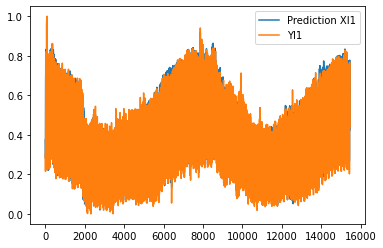

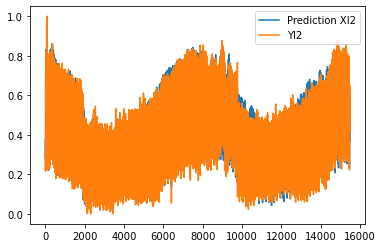

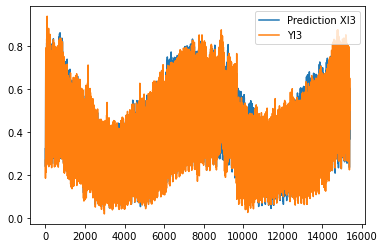

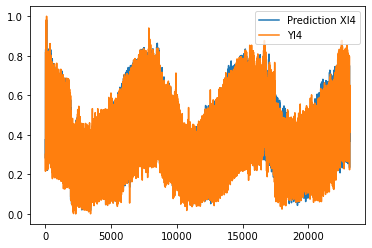

In [27]:
for i in range (5):
    if i!=0:
        plt.plot(model.predict(xl[i]));
        plt.plot(yl[i].to_numpy());
        plt.legend(['Prediction Xl{}'.format(i),'Yl{}'.format(i)]);
        plt.show();

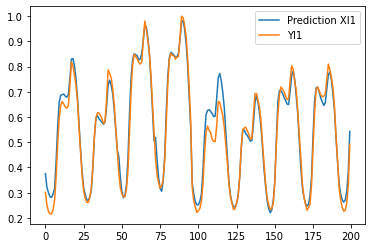

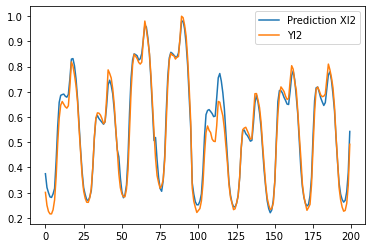

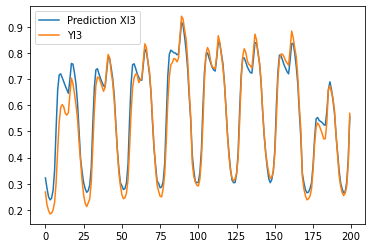

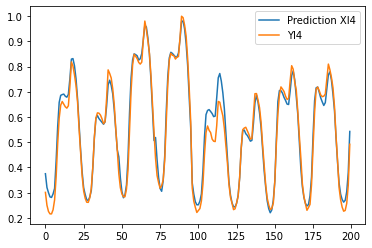

In [28]:
for i in range (5):
    if i!=0:
        plt.plot(model.predict(xl[i])[:200]);
        plt.plot(yl[i].to_numpy()[:200]);
        plt.legend(['Prediction Xl{}'.format(i),'Yl{}'.format(i)]);
        plt.show();

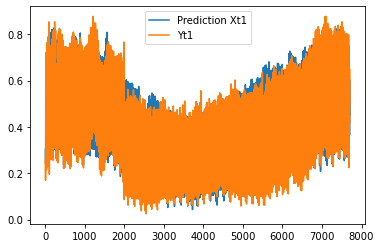

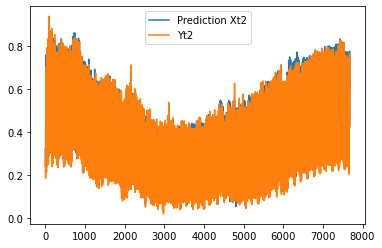

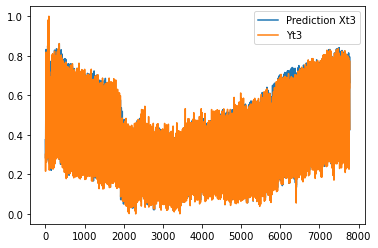

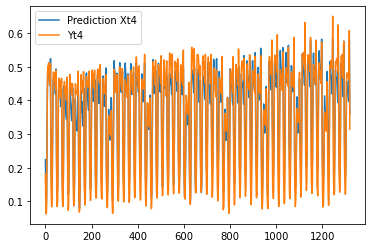

In [29]:
for i in range (5):
    if i!=0:
        plt.plot(model.predict(xt[i]));
        plt.plot(yt[i].to_numpy());
        plt.legend(['Prediction Xt{}'.format(i),'Yt{}'.format(i)]);
        plt.show();

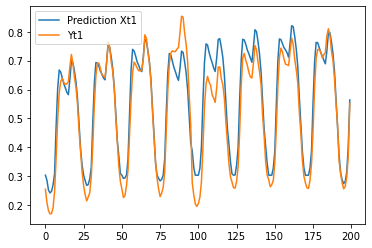

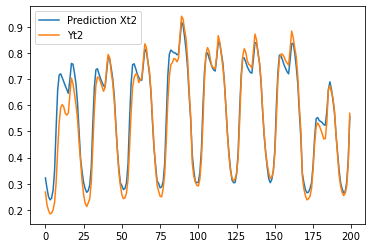

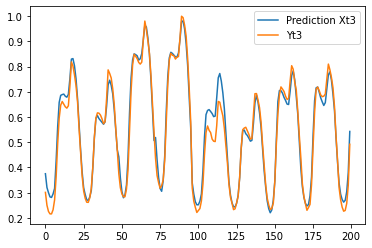

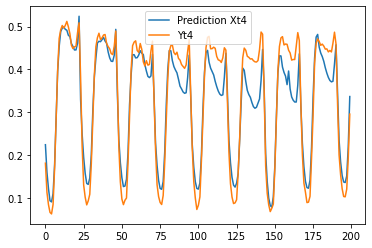

In [30]:
for i in range (5):
    if i!=0:
        plt.plot(model.predict(xt[i])[:200]);
        plt.plot(yt[i].to_numpy()[:200]);
        plt.legend(['Prediction Xt{}'.format(i),'Yt{}'.format(i)]);
        plt.show();

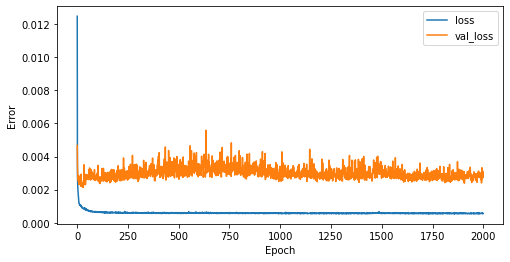

In [31]:
plt.figure(figsize=(8,4));
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.xlabel('Epoch');
plt.ylabel('Error');
plt.legend(['loss','val_loss']);

In [2]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6396853244356864684
]


In [ ]:
model = Sequential()
model.add(Dense(30, input_dim = 11, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(12, activation = 'relu', kernel_initializer = 'he_uniform')) 
model.add(Dense(12, activation = 'relu', kernel_initializer = 'he_uniform')) 
model.add(Dense(1, activation = 'linear', kernel_initializer = 'he_uniform')) 
model.compile(loss = 'mean_squared_error', optimizer = Adam(lr=0.01))